In [ ]:
### A script to estimate Mohseni parameters for RBM
# By Dylan Blaskey
# Written on 07/07/2022

In [2]:
import pandas as pd
import xarray as xr
import numpy as np

In [3]:
df_sites = pd.read_csv('/glade/scratch/dblaskey/RBM/USGS_COMID_list.csv', index_col=0)

In [5]:
temp_data = pd.read_csv('/glade/scratch/dblaskey/RBM/temperature_gages.csv', index_col=0)
#temp_data = temp_data[temp_data['X_00010_00003_cd'] == 'A']
#temp_data = temp_data.dropna()
df = pd.merge(temp_data, df_sites, on="site_no")
#df['Date'] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=df.Day, hour=df.Hour))
df

,agency_cd,site_no,Date,X_00010_00003,X_00010_00003_cd,station_nm,Lat,Long,COMID,drain_area_va,unitarea,geometry,outlet_comid
0,USGS,15057590,1999-09-30,6.5,A,KAHTAHEENA R NR GUSTAVUS AK,58.422997,-135.599874,81035550,10.7,27.778162,MULTIPOLYGON (((-134.8079166666667 59.41625000...,81020021
1,USGS,15057590,1999-10-01,7.0,A,KAHTAHEENA R NR GUSTAVUS AK,58.422997,-135.599874,81035550,10.7,27.778162,MULTIPOLYGON (((-134.8079166666667 59.41625000...,81020021
2,USGS,15057590,1999-10-02,7.0,A,KAHTAHEENA R NR GUSTAVUS AK,58.422997,-135.599874,81035550,10.7,27.778162,MULTIPOLYGON (((-134.8079166666667 59.41625000...,81020021
3,USGS,15057590,1999-10-03,7.0,A,KAHTAHEENA R NR GUSTAVUS AK,58.422997,-135.599874,81035550,10.7,27.778162,MULTIPOLYGON (((-134.8079166666667 59.41625000...,81020021
4,USGS,15057590,1999-10-04,6.5,A,KAHTAHEENA R NR GUSTAVUS AK,58.422997,-135.599874,81035550,10.7,27.778162,MULTIPOLYGON (((-134.8079166666667 59.41625000...,81020021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91142,USGS,15908000,2021-08-27,5.9,A,SAGAVANIRKTOK R NR PUMP STA 3 AK,69.015833,-148.817778,81002548,1850.0,88.189503,POLYGON ((-148.7429166666667 69.08458333333334...,81000433
91143,USGS,15908000,2021-08-28,4.8,A,SAGAVANIRKTOK R NR PUMP STA 3 AK,69.015833,-148.817778,81002548,1850.0,88.189503,POLYGON ((-148.7429166666667 69.08458333333334...,81000433
91144,USGS,15908000,2021-08-29,6.0,A,SAGAVANIRKTOK R NR PUMP STA 3 AK,69.015833,-148.817778,81002548,1850.0,88.189503,POLYGON ((-148.7429166666667 69.08458333333334...,81000433
91145,USGS,15908000,2021-08-30,7.2,A,SAGAVANIRKTOK R NR PUMP STA 3 AK,69.015833,-148.817778,81002548,1850.0,88.189503,POLYGON ((-148.7429166666667 69.08458333333334...,81000433


In [6]:
headwaters = df[df['drain_area_va'] < 500]
headwaters

,agency_cd,site_no,Date,X_00010_00003,X_00010_00003_cd,station_nm,Lat,Long,COMID,drain_area_va,unitarea,geometry,outlet_comid
0,USGS,15057590,1999-09-30,6.5,A,KAHTAHEENA R NR GUSTAVUS AK,58.422997,-135.599874,81035550,10.7,27.778162,MULTIPOLYGON (((-134.8079166666667 59.41625000...,81020021
1,USGS,15057590,1999-10-01,7.0,A,KAHTAHEENA R NR GUSTAVUS AK,58.422997,-135.599874,81035550,10.7,27.778162,MULTIPOLYGON (((-134.8079166666667 59.41625000...,81020021
2,USGS,15057590,1999-10-02,7.0,A,KAHTAHEENA R NR GUSTAVUS AK,58.422997,-135.599874,81035550,10.7,27.778162,MULTIPOLYGON (((-134.8079166666667 59.41625000...,81020021
3,USGS,15057590,1999-10-03,7.0,A,KAHTAHEENA R NR GUSTAVUS AK,58.422997,-135.599874,81035550,10.7,27.778162,MULTIPOLYGON (((-134.8079166666667 59.41625000...,81020021
4,USGS,15057590,1999-10-04,6.5,A,KAHTAHEENA R NR GUSTAVUS AK,58.422997,-135.599874,81035550,10.7,27.778162,MULTIPOLYGON (((-134.8079166666667 59.41625000...,81020021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79140,USGS,15519100,2022-03-20,0.0,P,TOLOVANA R BL ROSEBUD C NR LIVENGOOD AK,65.464841,-148.631114,81012001,243.0,22.772364,MULTIPOLYGON (((-148.6304166666667 65.51208333...,81020021
79141,USGS,15519100,2022-03-21,0.0,P,TOLOVANA R BL ROSEBUD C NR LIVENGOOD AK,65.464841,-148.631114,81012001,243.0,22.772364,MULTIPOLYGON (((-148.6304166666667 65.51208333...,81020021
79142,USGS,15519100,2022-03-22,0.0,P,TOLOVANA R BL ROSEBUD C NR LIVENGOOD AK,65.464841,-148.631114,81012001,243.0,22.772364,MULTIPOLYGON (((-148.6304166666667 65.51208333...,81020021
79143,USGS,15519100,2022-03-23,0.0,P,TOLOVANA R BL ROSEBUD C NR LIVENGOOD AK,65.464841,-148.631114,81012001,243.0,22.772364,MULTIPOLYGON (((-148.6304166666667 65.51208333...,81020021


In [7]:
dates = pd.DataFrame({'Date': np.unique(headwaters['Date'].values)})

In [6]:
import datetime as dt

In [7]:
#dates['day'] = dates['Date'].dt.day
#dates['month'] = dates['Date'].dt.month
#dates['year'] = dates['Date'].dt.year

In [9]:
def x_round(x):
    return round(x*4)/4

In [10]:
lat_round = x_round(headwaters['Lat'])
long_round = x_round(headwaters['Long'])+180
ERA5_Temp = pd.DataFrame({'lat': headwaters['Lat'], 'long': headwaters['Long'], 'lat_round': lat_round, 'long_round': long_round}).drop_duplicates()

In [11]:
ERA5_Temp['lat_index'] = ((90 - ERA5_Temp['lat_round'])/0.25).astype(float)
ERA5_Temp['lon_index'] = ((180 + ERA5_Temp['long_round'])/0.25).astype(float)

In [10]:
ERA5_Temp

,lat,long,lat_round,long_round,lat_index,lon_index
0,55.908611,-132.930833,56.00,47.00,136.0,908.0
21778,57.060750,-135.211484,57.00,44.75,132.0,899.0
28120,57.142716,-134.865642,57.25,45.25,131.0,901.0
105135,61.684389,-149.052417,61.75,31.00,113.0,844.0
179015,62.104762,-150.059749,62.00,30.00,112.0,840.0
194260,61.809746,-150.097238,61.75,30.00,113.0,840.0
206938,61.780303,-149.886679,61.75,30.00,113.0,840.0
225327,62.132833,-150.538667,62.25,29.50,111.0,838.0
245728,59.757950,-153.846887,59.75,26.25,121.0,825.0
266675,60.153994,-158.736692,60.25,21.25,119.0,805.0


In [11]:
from calendar import monthrange
import subprocess

In [50]:
# Make sure there are no .nc files in the folder or step 2 and 3 wont work
# Set bounding box to max,min lat,long

for year in range(2007, 2021):
    print(year)
    months = range(1,13)
    
    for month in months:
        num_days = monthrange(year, month)[1]
        args ='ncks -d latitude,55.,66. -d longitude,20.,48. /glade/collections/rda/data/ds633.0/e5.oper.an.sfc/%s%02d/e5.oper.an.sfc.128_167_2t.ll025sc.%s%02d0100_%s%02d%s23.nc -O /glade/scratch/dblaskey/ERA5/%s%02d.nc'%(year, month, year, month, year, month, num_days, year, month)
        subprocess.call(args, shell=True)

print('On to step 2!')
args ='ncrcat -h /glade/scratch/dblaskey/ERA5/*.nc /glade/scratch/dblaskey/ERA5/cat_temp.nc'
subprocess.call(args, shell=True)

print('On to step 3!')
args ='cdo daymean /glade/scratch/dblaskey/ERA5/cat_temp.nc /glade/scratch/dblaskey/ERA5/cat_temp_daily.nc'
subprocess.call(args, shell=True)

2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
On to step 2!
On to step 3!


127

In [12]:
temporary_xr = xr.open_dataset('/glade/scratch/dblaskey/ERA5/cat_temp.nc')

In [15]:
del temporary_xr

In [13]:
temporary_xa = temporary_xr['VAR_2T']
temporary_xa = temporary_xa.resample(time='1D').mean(dim='time')

/glade/u/home/dblaskey/miniconda3/envs/py3/lib/python3.6/site-packages/xarray/core/common.py:1124: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  freq=freq, closed=closed, label=label, base=base, loffset=loffset


In [3]:
temporary_xr

<xarray.Dataset>
Dimensions:    (latitude: 45, longitude: 113, time: 122736)
Coordinates:
  * latitude   (latitude) float64 66.0 65.75 65.5 65.25 ... 55.5 55.25 55.0
  * longitude  (longitude) float64 20.0 20.25 20.5 20.75 ... 47.5 47.75 48.0
  * time       (time) datetime64[ns] 2007-01-01 ... 2020-12-31T23:00:00
Data variables:
    VAR_2T     (time, latitude, longitude) float32 ...
    utc_date   (time) int32 ...
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB1 data to netCDF4.
    NETCDF_VERSION:       4.6.1
    CONVERSION_PLATFORM:  Linux casper02 3.10.0-693.21.1.el7.x86_64 #1 SMP We...
    CONVERSION_DATE:      Mon Aug 12 20:40:41 MDT 2019
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Wed Nov  2 11:36:06 2022: ncks -d latitude,55.,66. ...
    NCO:                  netCDF Operators version 5.0.3 (Homepage = http://n...

In [14]:
list_df = []
for i in range(len(ERA5_Temp)):
    df = pd.DataFrame(index=temporary_xa.coords['time'].values)
    df['Temperature'] = temporary_xa.loc[:,ERA5_Temp['lat_round'].values[i],ERA5_Temp['long_round'].values[i]].values
    df['Lat'] = ERA5_Temp['lat'].values[i]
    df['Long'] = ERA5_Temp['long'].values[i]
    list_df.append(df)

In [17]:
list_df

[            Temperature        Lat        Long
 2007-01-01   270.636841  55.908611 -132.930833
 2007-01-02   274.077057  55.908611 -132.930833
 2007-01-03   274.251953  55.908611 -132.930833
 2007-01-04   273.449677  55.908611 -132.930833
 2007-01-05   271.697693  55.908611 -132.930833
 ...                 ...        ...         ...
 2020-12-27   268.881897  55.908611 -132.930833
 2020-12-28   262.985626  55.908611 -132.930833
 2020-12-29   258.239258  55.908611 -132.930833
 2020-12-30   263.311127  55.908611 -132.930833
 2020-12-31   265.230560  55.908611 -132.930833
 
 [5114 rows x 3 columns],
             Temperature       Lat        Long
 2007-01-01   271.868622  57.06075 -135.211484
 2007-01-02   274.087738  57.06075 -135.211484
 2007-01-03   274.256592  57.06075 -135.211484
 2007-01-04   273.096985  57.06075 -135.211484
 2007-01-05   271.358582  57.06075 -135.211484
 ...                 ...       ...         ...
 2020-12-27   268.579163  57.06075 -135.211484
 2020-12-28   259.31

In [15]:
df_temp = pd.concat(list_df)

In [16]:
df_temp['Date'] = df_temp.index.values
df_temp['Date'].values[0]

numpy.datetime64('2007-01-01T00:00:00.000000000')

In [17]:
df = pd.merge(headwaters, df_sites, on="site_no")

In [18]:
import matplotlib.pyplot as plt

In [37]:
fig, ax = plt.subplots()
ax.scatter(test['Air_Temp'].values, test['X_00010_00003'].values)

ax.set(xlabel='Air Temperature (C)', ylabel='Water Temp (C)',
       title='15057590 Headwater-Air Temperature Relationship')
ax.grid()

#fig.savefig("test.png")
plt.show()

NameError: name 'plt' is not defined

In [41]:
headwaters

,agency_cd,site_no,Date,X_00010_00003,X_00010_00003_cd,station_nm,Lat,Long,COMID,drain_area_va,unitarea,geometry,outlet_comid
0,USGS,15057590,1999-09-30,6.5,A,KAHTAHEENA R NR GUSTAVUS AK,58.422997,-135.599874,81035550,10.7,27.778162,MULTIPOLYGON (((-134.8079166666667 59.41625000...,81020021
1,USGS,15057590,1999-10-01,7.0,A,KAHTAHEENA R NR GUSTAVUS AK,58.422997,-135.599874,81035550,10.7,27.778162,MULTIPOLYGON (((-134.8079166666667 59.41625000...,81020021
2,USGS,15057590,1999-10-02,7.0,A,KAHTAHEENA R NR GUSTAVUS AK,58.422997,-135.599874,81035550,10.7,27.778162,MULTIPOLYGON (((-134.8079166666667 59.41625000...,81020021
3,USGS,15057590,1999-10-03,7.0,A,KAHTAHEENA R NR GUSTAVUS AK,58.422997,-135.599874,81035550,10.7,27.778162,MULTIPOLYGON (((-134.8079166666667 59.41625000...,81020021
4,USGS,15057590,1999-10-04,6.5,A,KAHTAHEENA R NR GUSTAVUS AK,58.422997,-135.599874,81035550,10.7,27.778162,MULTIPOLYGON (((-134.8079166666667 59.41625000...,81020021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79140,USGS,15519100,2022-03-20,0.0,P,TOLOVANA R BL ROSEBUD C NR LIVENGOOD AK,65.464841,-148.631114,81012001,243.0,22.772364,MULTIPOLYGON (((-148.6304166666667 65.51208333...,81020021
79141,USGS,15519100,2022-03-21,0.0,P,TOLOVANA R BL ROSEBUD C NR LIVENGOOD AK,65.464841,-148.631114,81012001,243.0,22.772364,MULTIPOLYGON (((-148.6304166666667 65.51208333...,81020021
79142,USGS,15519100,2022-03-22,0.0,P,TOLOVANA R BL ROSEBUD C NR LIVENGOOD AK,65.464841,-148.631114,81012001,243.0,22.772364,MULTIPOLYGON (((-148.6304166666667 65.51208333...,81020021
79143,USGS,15519100,2022-03-23,0.0,P,TOLOVANA R BL ROSEBUD C NR LIVENGOOD AK,65.464841,-148.631114,81012001,243.0,22.772364,MULTIPOLYGON (((-148.6304166666667 65.51208333...,81020021


In [19]:
headwaters['Date'] = pd.to_datetime(headwaters['Date']).dt.date

/glade/u/home/dblaskey/miniconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df_temp['Date'] = pd.to_datetime(df_temp['Date']).dt.date

In [21]:
merge_df = headwaters.merge(df_temp, how='left', on=['Date','Lat','Long'])

In [22]:
merge_df = merge_df.dropna()

In [23]:
merge_df['Air_Temp'] = merge_df['Temperature'] - 273.15

In [27]:
merge_df

,site_no,Year,Month,Day,Hour,tempC,station_nm,Lat,Long,COMID,drain_area_va,unitarea,geometry,outlet_comid,Date,Temperature,Air_Temp
0,15086225,2016,10,25,21,7.920000,HATCHERY C AT FOREST SVC RD 23 NR COFFMAN COVE AK,55.908611,-132.930833,81036006,39.0,25.844953,MULTIPOLYGON (((-134.0754166666667 59.09291666...,81020021,2016-10-25 21:00:00,268.701569,-4.448431
1,15086225,2016,10,25,21,7.920000,HATCHERY C AT FOREST SVC RD 23 NR COFFMAN COVE AK,55.908611,-132.930833,81036006,39.0,25.844953,MULTIPOLYGON (((-134.0754166666667 59.09291666...,81020021,2016-10-25 21:00:00,268.701569,-4.448431
2,15086225,2016,10,26,0,8.000000,HATCHERY C AT FOREST SVC RD 23 NR COFFMAN COVE AK,55.908611,-132.930833,81036006,39.0,25.844953,MULTIPOLYGON (((-134.0754166666667 59.09291666...,81020021,2016-10-26 00:00:00,268.426544,-4.723456
3,15086225,2016,10,26,0,8.000000,HATCHERY C AT FOREST SVC RD 23 NR COFFMAN COVE AK,55.908611,-132.930833,81036006,39.0,25.844953,MULTIPOLYGON (((-134.0754166666667 59.09291666...,81020021,2016-10-26 00:00:00,268.426544,-4.723456
4,15086225,2016,10,26,3,7.933333,HATCHERY C AT FOREST SVC RD 23 NR COFFMAN COVE AK,55.908611,-132.930833,81036006,39.0,25.844953,MULTIPOLYGON (((-134.0754166666667 59.09291666...,81020021,2016-10-26 03:00:00,269.131683,-4.018317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172649,15519100,2020,12,31,9,0.000000,TOLOVANA R BL ROSEBUD C NR LIVENGOOD AK,65.464841,-148.631114,81012001,243.0,22.772364,MULTIPOLYGON (((-148.6304166666667 65.51208333...,81020021,2020-12-31 09:00:00,270.804535,-2.345465
172650,15519100,2020,12,31,12,0.000000,TOLOVANA R BL ROSEBUD C NR LIVENGOOD AK,65.464841,-148.631114,81012001,243.0,22.772364,MULTIPOLYGON (((-148.6304166666667 65.51208333...,81020021,2020-12-31 12:00:00,269.973907,-3.176093
172651,15519100,2020,12,31,15,0.000000,TOLOVANA R BL ROSEBUD C NR LIVENGOOD AK,65.464841,-148.631114,81012001,243.0,22.772364,MULTIPOLYGON (((-148.6304166666667 65.51208333...,81020021,2020-12-31 15:00:00,269.688385,-3.461615
172652,15519100,2020,12,31,18,0.000000,TOLOVANA R BL ROSEBUD C NR LIVENGOOD AK,65.464841,-148.631114,81012001,243.0,22.772364,MULTIPOLYGON (((-148.6304166666667 65.51208333...,81020021,2020-12-31 18:00:00,269.824860,-3.325140


In [26]:
from scipy import optimize
import math

In [24]:
# Mohseni Function
def func(x, a, b, m, g):
    y = m + (a-m)/(1 + math.e**(g*(b-x)))
    return y

In [56]:
np.unique(merge_df['site_no'].values)

array([15086225, 15087810, 15100000, 15283700, 15292800, 15293700,
       15294005, 15294080, 15300300, 15301500, 15302250, 15304010,
       15519100])

In [33]:
test_df

,agency_cd,site_no,Date,X_00010_00003,X_00010_00003_cd,station_nm,Lat,Long,COMID,drain_area_va,unitarea,geometry,outlet_comid,Temperature,Air_Temp
33767,USGS,15392000,2011-06-17,5.0,A,BIRCH C AB TWELVEMILE C NR MILLER HOUSE AK,65.392116,-145.714956,81013225,89.2,31.130767,MULTIPOLYGON (((-145.6904166666667 65.45791666...,81020021,285.104553,11.954553
33768,USGS,15392000,2011-06-18,6.0,A,BIRCH C AB TWELVEMILE C NR MILLER HOUSE AK,65.392116,-145.714956,81013225,89.2,31.130767,MULTIPOLYGON (((-145.6904166666667 65.45791666...,81020021,283.893402,10.743402
33769,USGS,15392000,2011-06-19,6.5,A,BIRCH C AB TWELVEMILE C NR MILLER HOUSE AK,65.392116,-145.714956,81013225,89.2,31.130767,MULTIPOLYGON (((-145.6904166666667 65.45791666...,81020021,283.554138,10.404138
33770,USGS,15392000,2011-06-20,7.0,A,BIRCH C AB TWELVEMILE C NR MILLER HOUSE AK,65.392116,-145.714956,81013225,89.2,31.130767,MULTIPOLYGON (((-145.6904166666667 65.45791666...,81020021,285.001068,11.851068
33771,USGS,15392000,2011-06-21,6.5,A,BIRCH C AB TWELVEMILE C NR MILLER HOUSE AK,65.392116,-145.714956,81013225,89.2,31.130767,MULTIPOLYGON (((-145.6904166666667 65.45791666...,81020021,288.086212,14.936212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34000,USGS,15392000,2012-09-25,2.5,A,BIRCH C AB TWELVEMILE C NR MILLER HOUSE AK,65.392116,-145.714956,81013225,89.2,31.130767,MULTIPOLYGON (((-145.6904166666667 65.45791666...,81020021,278.349060,5.199060
34001,USGS,15392000,2012-09-26,3.5,A,BIRCH C AB TWELVEMILE C NR MILLER HOUSE AK,65.392116,-145.714956,81013225,89.2,31.130767,MULTIPOLYGON (((-145.6904166666667 65.45791666...,81020021,277.289154,4.139154
34002,USGS,15392000,2012-09-27,2.5,A,BIRCH C AB TWELVEMILE C NR MILLER HOUSE AK,65.392116,-145.714956,81013225,89.2,31.130767,MULTIPOLYGON (((-145.6904166666667 65.45791666...,81020021,279.902252,6.752252
34003,USGS,15392000,2012-09-28,2.0,A,BIRCH C AB TWELVEMILE C NR MILLER HOUSE AK,65.392116,-145.714956,81013225,89.2,31.130767,MULTIPOLYGON (((-145.6904166666667 65.45791666...,81020021,282.127136,8.977136


In [38]:
param_list = []
cov_list = []
for site in np.unique(merge_df['site_no'].values):
    print(site)
    test_df = merge_df[merge_df['site_no'] == site]
    par, cov = optimize.curve_fit(func, xdata = test_df['Air_Temp'].values, ydata = test_df['X_00010_00003'].values) # Least Square Regression for Nonlinear Functions
    param_list.append(par)
    cov_list.append(cov)

15086225
15087300
15087810
15100000
15106920
15283700
15292800
15293700
15294005
15294080
15300270
15300300
15301500
15302250
15304010
15392000


/glade/u/home/dblaskey/miniconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

In [28]:
param_list

[array([16.5460593 ,  6.36307866,  2.24223374,  0.25166119]),
 array([11.33729032,  8.26867135,  0.16083646,  0.24179631]),
 array([ 7.06387265,  7.02711037,  5.01168982, 58.46200874]),
 array([9.72238225, 7.37530741, 3.10655361, 0.30114125]),
 array([7.53988728, 7.98390147, 0.56810511, 0.4838469 ]),
 array([8.77806761e+00, 8.61409430e+00, 5.14792076e-03, 3.55110602e-01]),
 array([12.31063652,  9.05196185, -0.12301896,  0.33765718]),
 array([12.41621215,  9.20997698, -0.1076283 ,  0.35444147]),
 array([10.7506368 ,  9.0898642 , -0.03461267,  0.37259962]),
 array([15.10009749,  8.65448588, -0.03108431,  0.38772049]),
 array([ 9.65417481, 11.49564849, -0.0322829 ,  0.37415052]),
 array([11.93854639, 11.25204568,  0.43409385,  0.24840337]),
 array([13.28337238, 14.96752082, -0.23673959,  0.17122001]),
 array([11.42594769, 10.81931578, -0.02023236,  0.39958958]),
 array([9.09273156, 9.62568953, 0.05309494, 0.48039002])]

In [29]:
cov_list

[array([[ 2.33652041e-02,  1.32850127e-02, -7.48262250e-03,
         -1.11266205e-03],
        [ 1.32850127e-02,  2.83051542e-02,  8.83955981e-03,
         -1.71600177e-04],
        [-7.48262250e-03,  8.83955981e-03,  1.81445999e-02,
          8.93959092e-04],
        [-1.11266205e-03, -1.71600177e-04,  8.93959092e-04,
          9.99177184e-05]]),
 array([[ 0.06798587,  0.05186203, -0.01746474, -0.00368526],
        [ 0.05186203,  0.1135163 ,  0.02049757, -0.0012818 ],
        [-0.01746474,  0.02049757,  0.03677022,  0.00235989],
        [-0.00368526, -0.0012818 ,  0.00235989,  0.00037887]]),
 array([[ 1.15859721e-02,  1.70150853e-03, -6.19868921e-06,
         -1.82399701e+00],
        [ 1.70150853e-03,  3.72500876e-02,  8.04708302e-04,
         -1.09311411e+01],
        [-6.19868921e-06,  8.04708302e-04,  7.18940818e-03,
          8.68892264e-01],
        [-1.82399701e+00, -1.09311411e+01,  8.68892264e-01,
          4.17626073e+04]]),
 array([[ 0.02328718,  0.02920683, -0.00516949, -0

In [30]:
parameters = pd.DataFrame(data = param_list, columns= ["alpha", "beta", "mu", "gamma"])
print('alpha: '+ str(parameters['alpha'].mean()) + ", " + 'beta: '+ str(parameters['beta'].mean()) + ", " 'mu: '+ str(parameters['mu'].mean()) + ", " 'gamma: '+ str(parameters['gamma'].mean()))

alpha: 11.130661013300092, beta: 9.319911517457609, mu: 0.7330770900876938, gamma: 4.214782483402572


In [37]:
np.unique(merge_df['site_no'].values)

array([15086225, 15087300, 15087810, 15100000, 15106920, 15283700,
       15292800, 15293700, 15294005, 15294080, 15300270, 15300300,
       15301500, 15302250, 15304010, 15392000, 15518900, 15519100])

In [40]:
sites= [15086225, 15087300, 15087810, 15100000, 15106920, 15283700, 15292800, 15293700, 15294005, 15294080, 15300270, 15300300, 15301500, 15302250, 15304010]
parameters['site_no'] = sites
#parameters['site_no'] = np.unique(merge_df['site_no'].values)

In [41]:
parameters_loc = pd.merge(parameters, df_sites, on="site_no")

In [44]:
def label_loc (row):
    if row['Lat'] > 68 :
        return 'North'
    if row['Lat'] < 61.5 :
        return 'South'
    return 'Interior'

In [47]:
parameters_loc["Location"] = parameters_loc.apply (lambda row: label_loc(row), axis=1)

In [49]:
parameters_loc.groupby('Location').mean()

,alpha,beta,mu,gamma,site_no,Lat,Long,COMID,drain_area_va,unitarea,outlet_comid
Location,,,,,,,,,,,
Interior,11.408064,9.041012,-0.039684,0.381320,1.529372e+07,61.900222,-151.298598,8.102559e+07,157.816667,50.734417,8.102803e+07
South,11.013934,8.814367,1.673505,9.245417,1.515645e+07,57.757407,-140.748646,8.103541e+07,67.861538,32.509029,8.102487e+07


In [43]:
import matplotlib.pyplot as plt

In [99]:
parameters_loc.site_no.unique()

array([15086225, 15087810, 15100000, 15283700, 15292800, 15293700,
       15294005, 15294080, 15300300, 15301500, 15302250, 15304010,
       15519100])

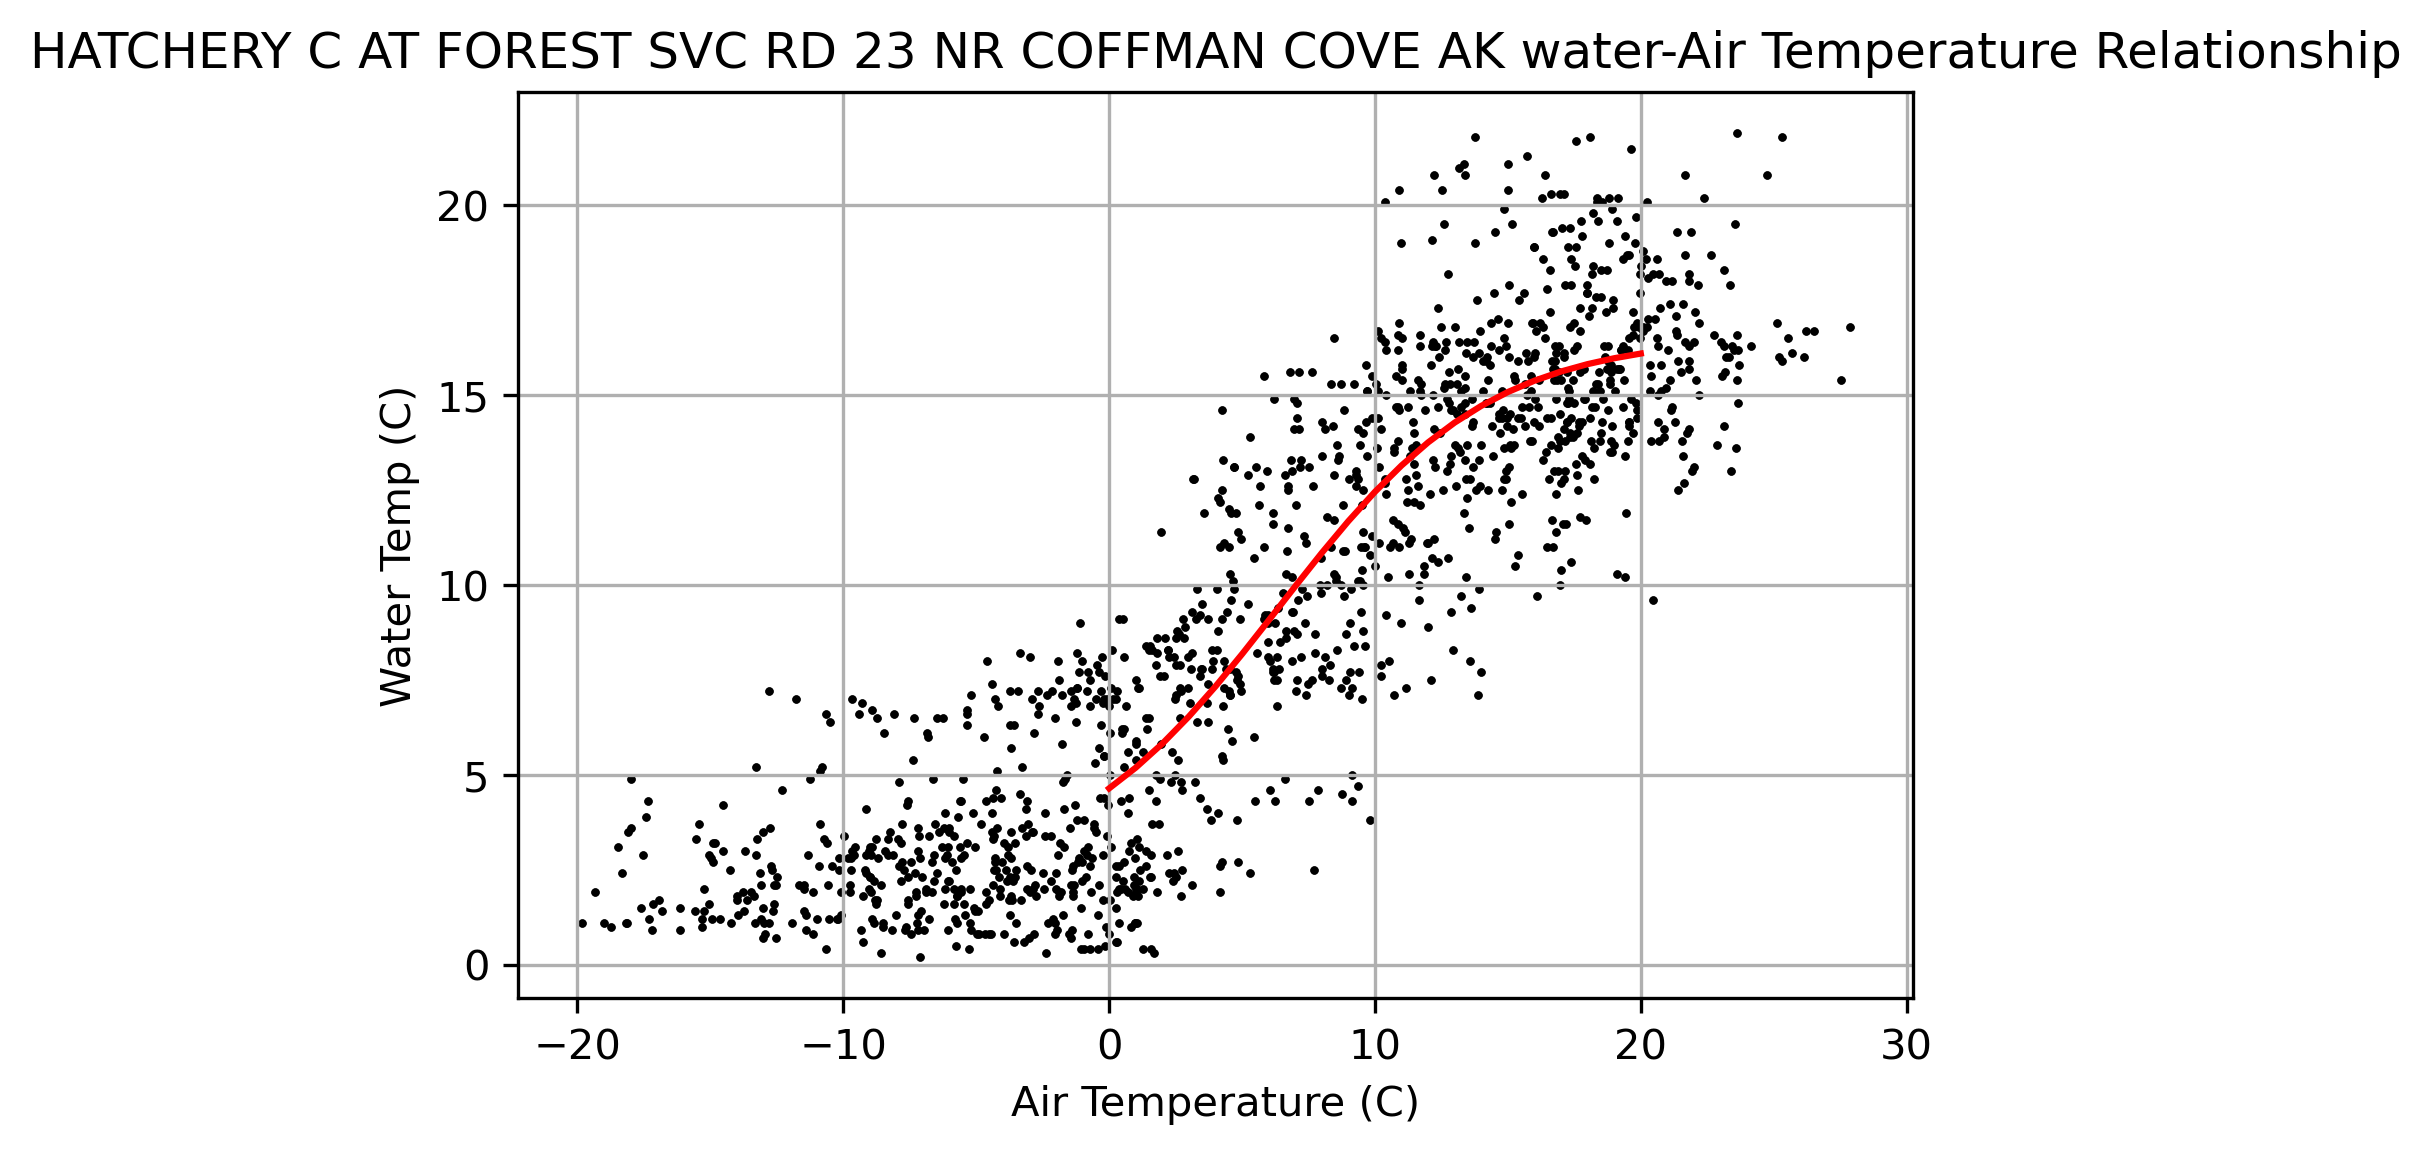

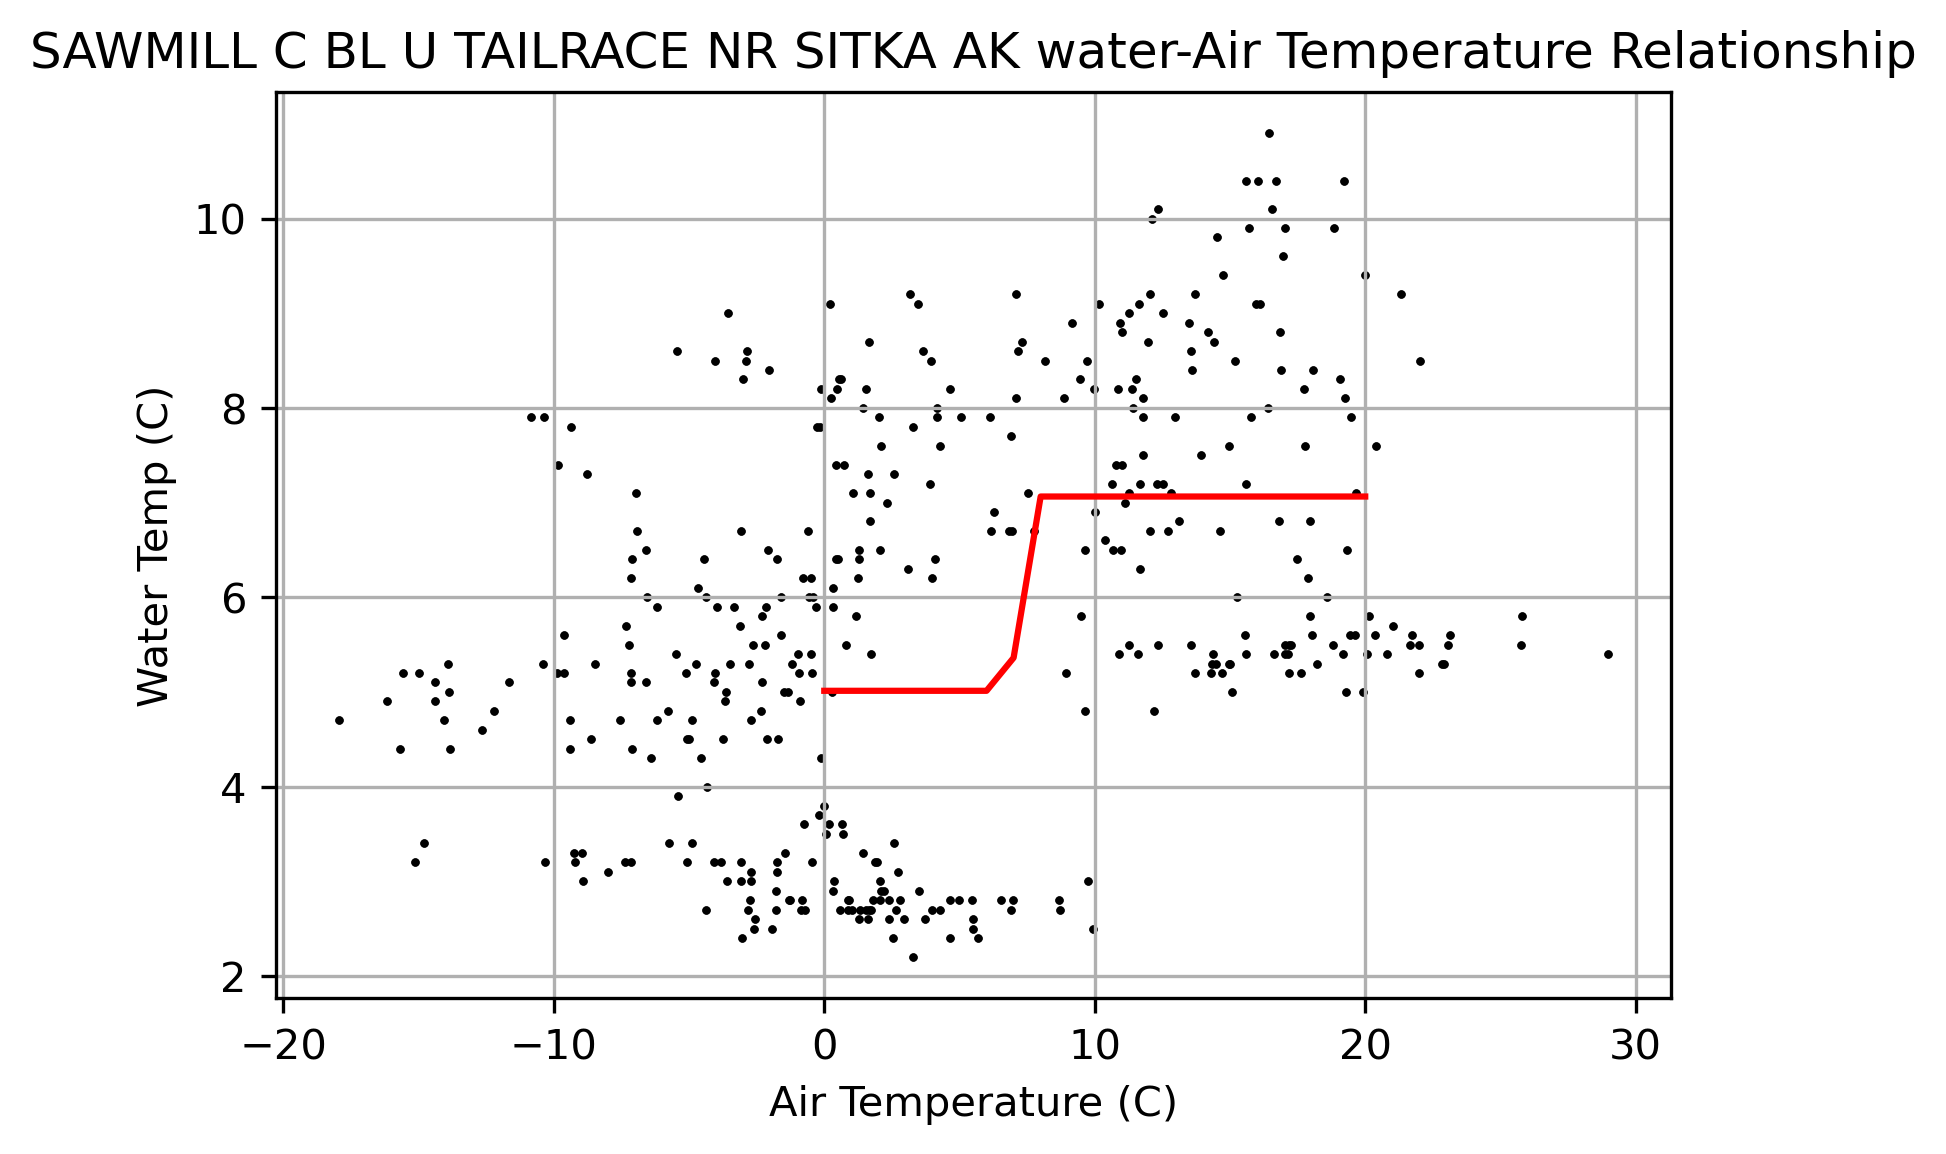

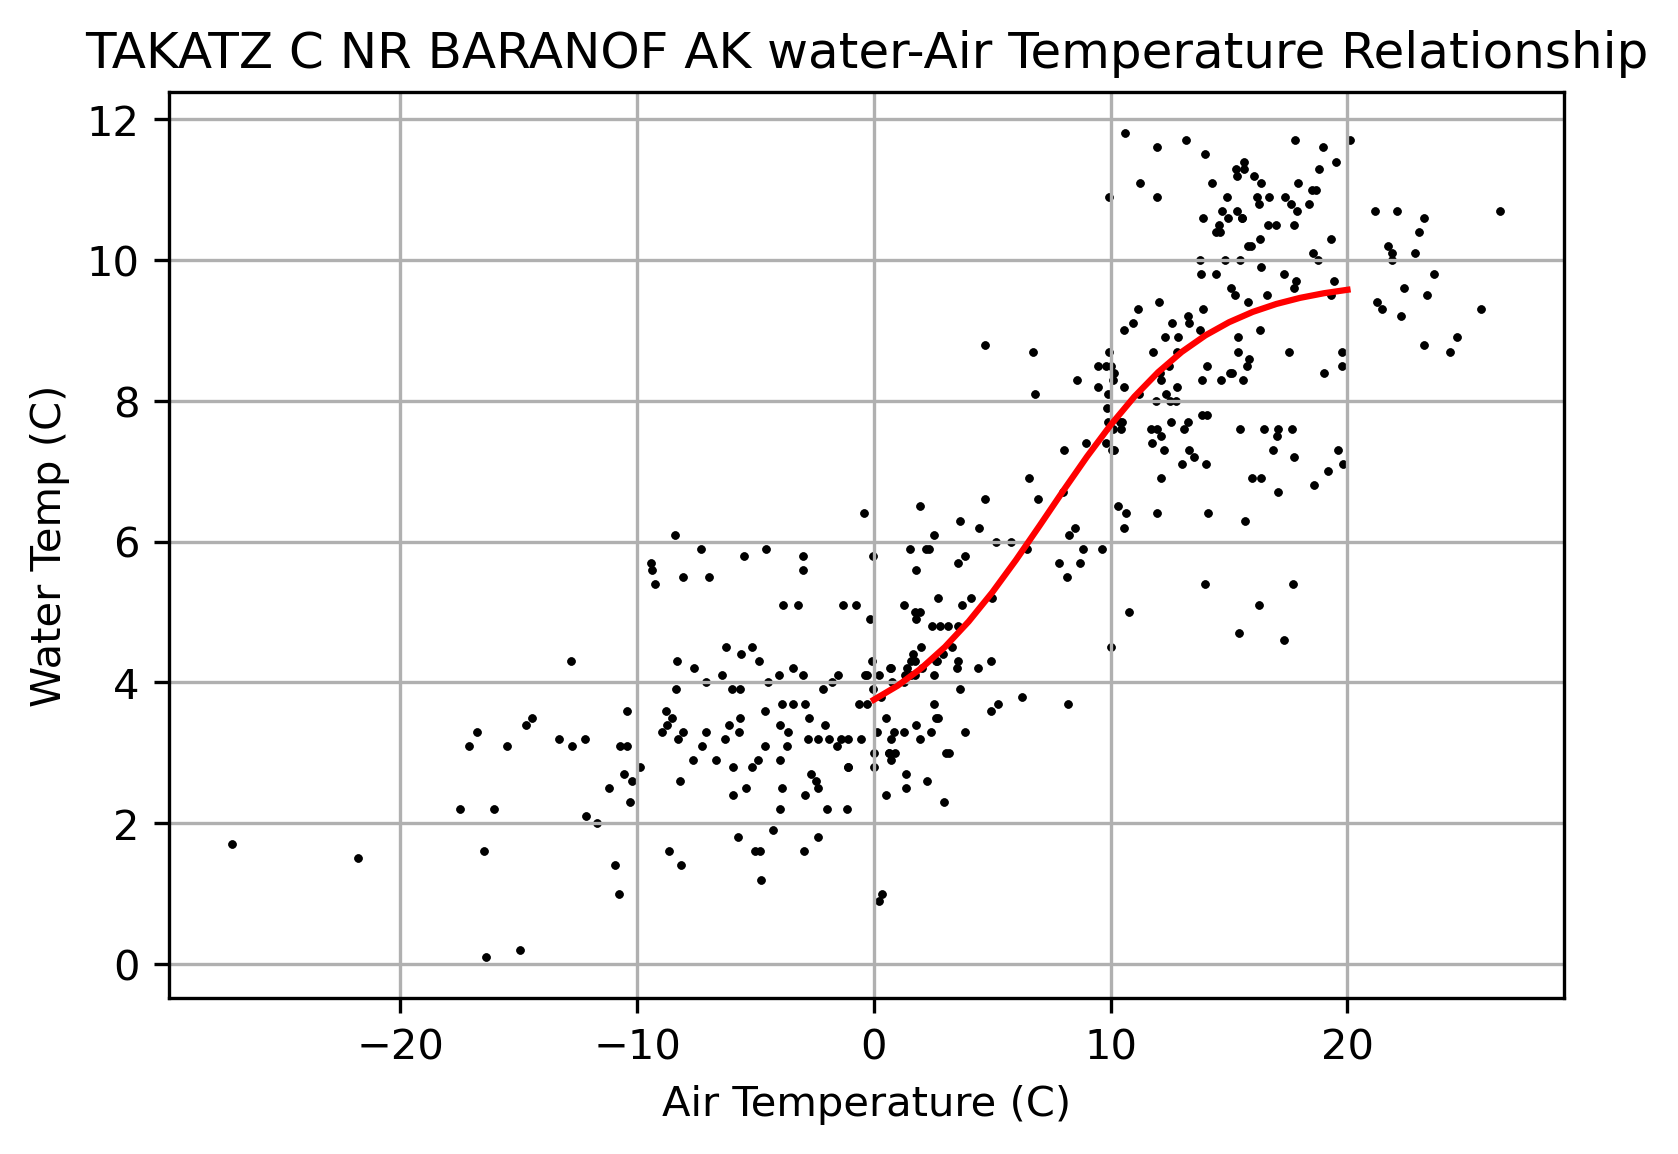

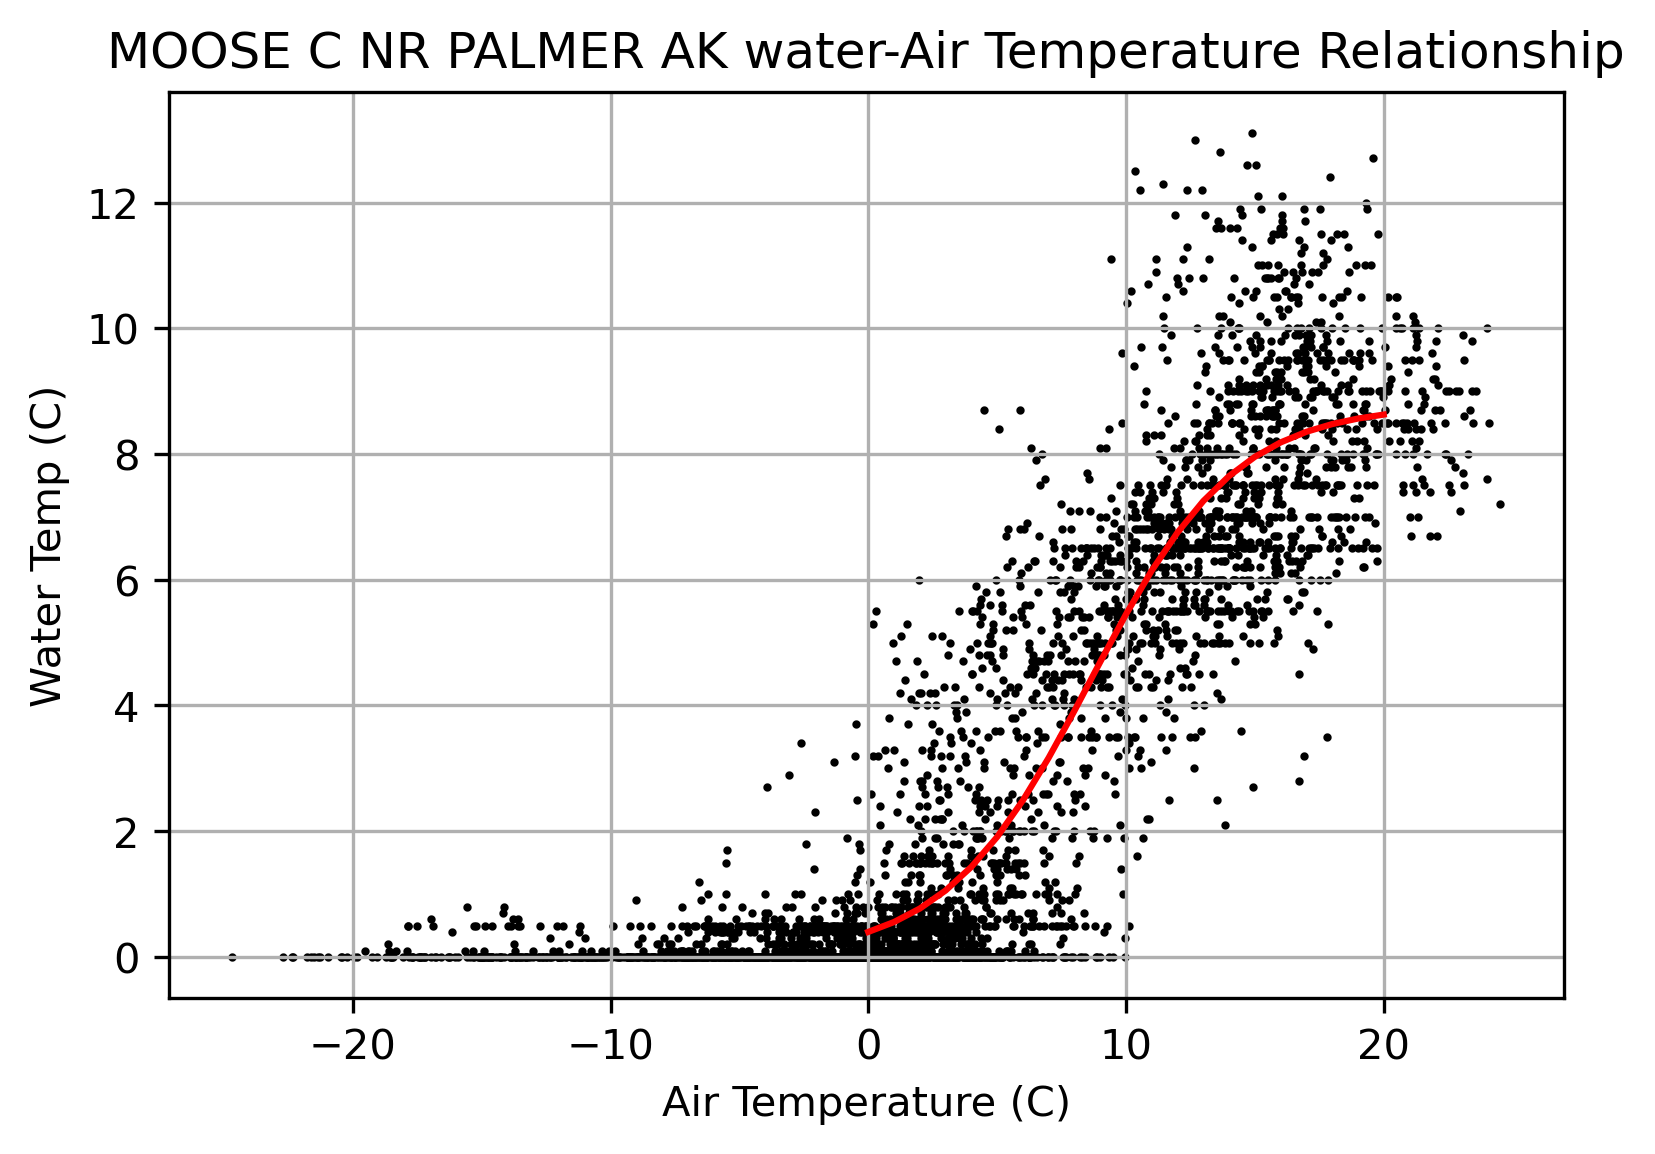

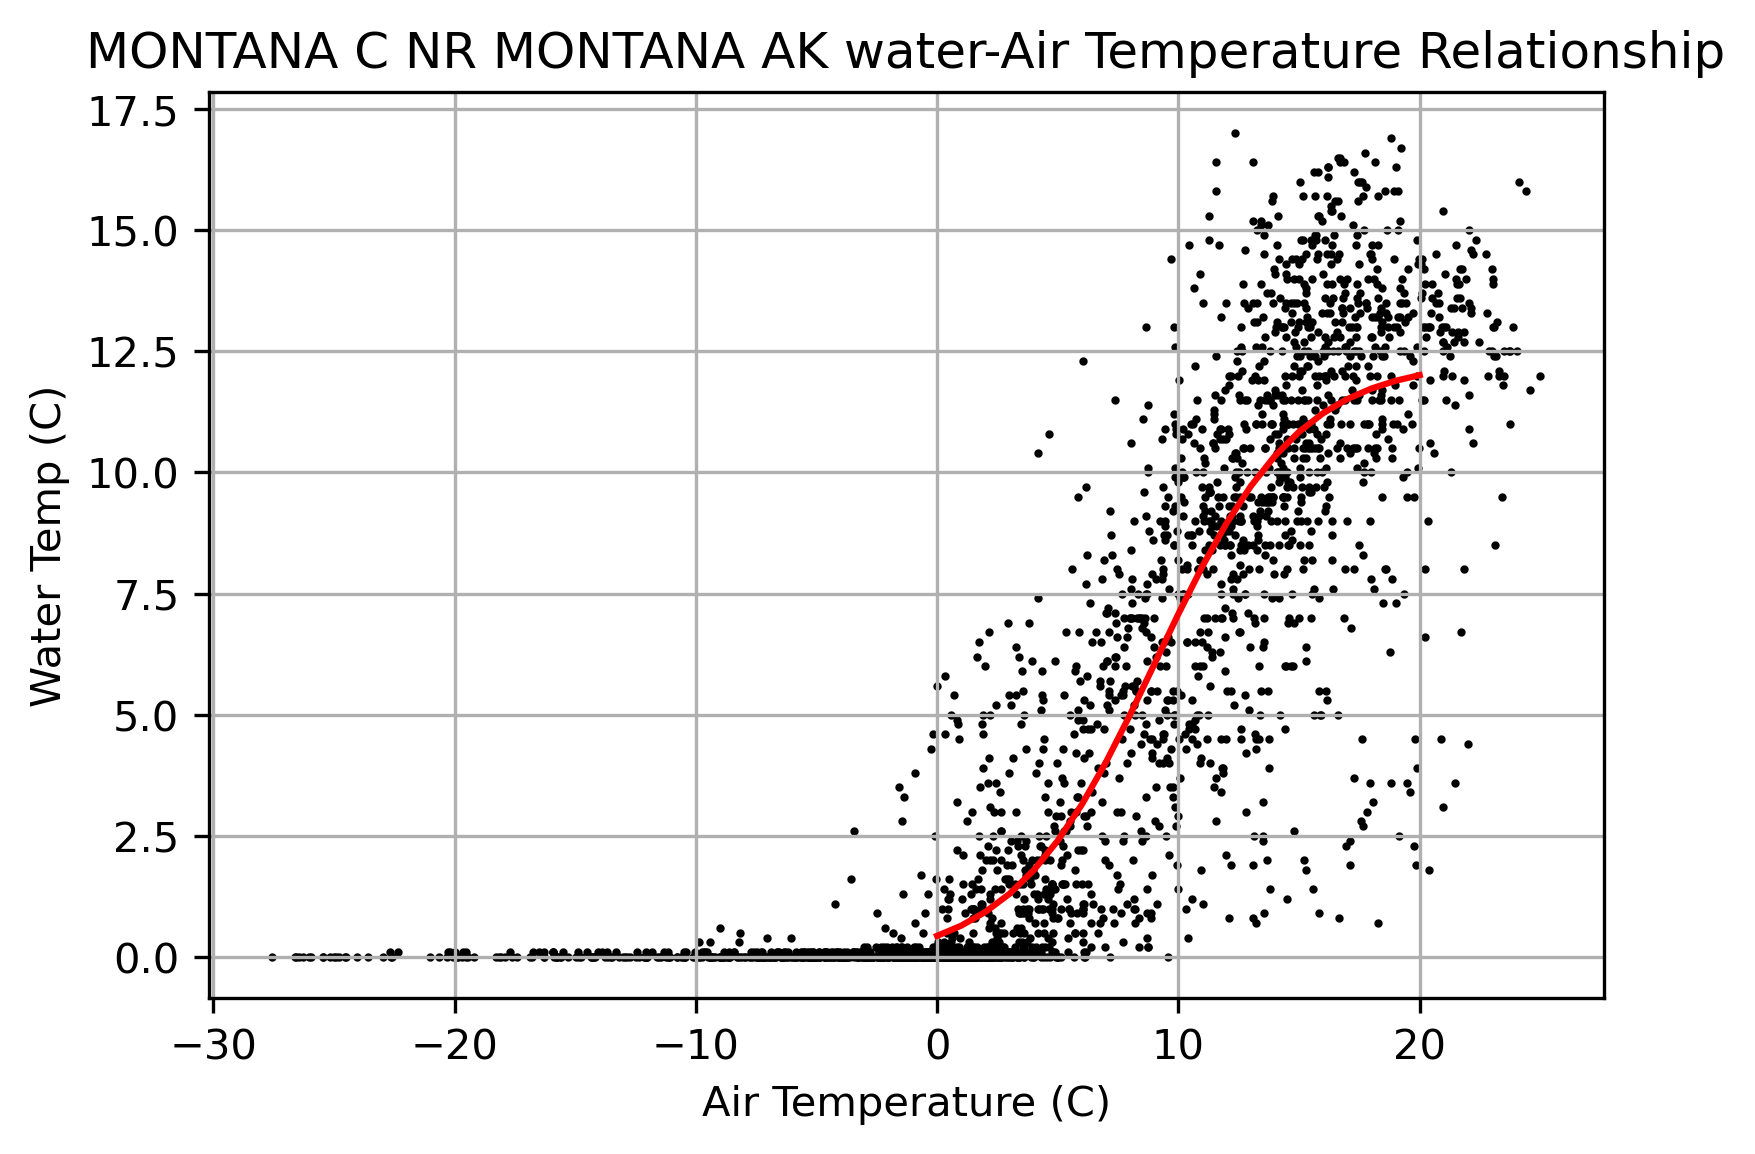

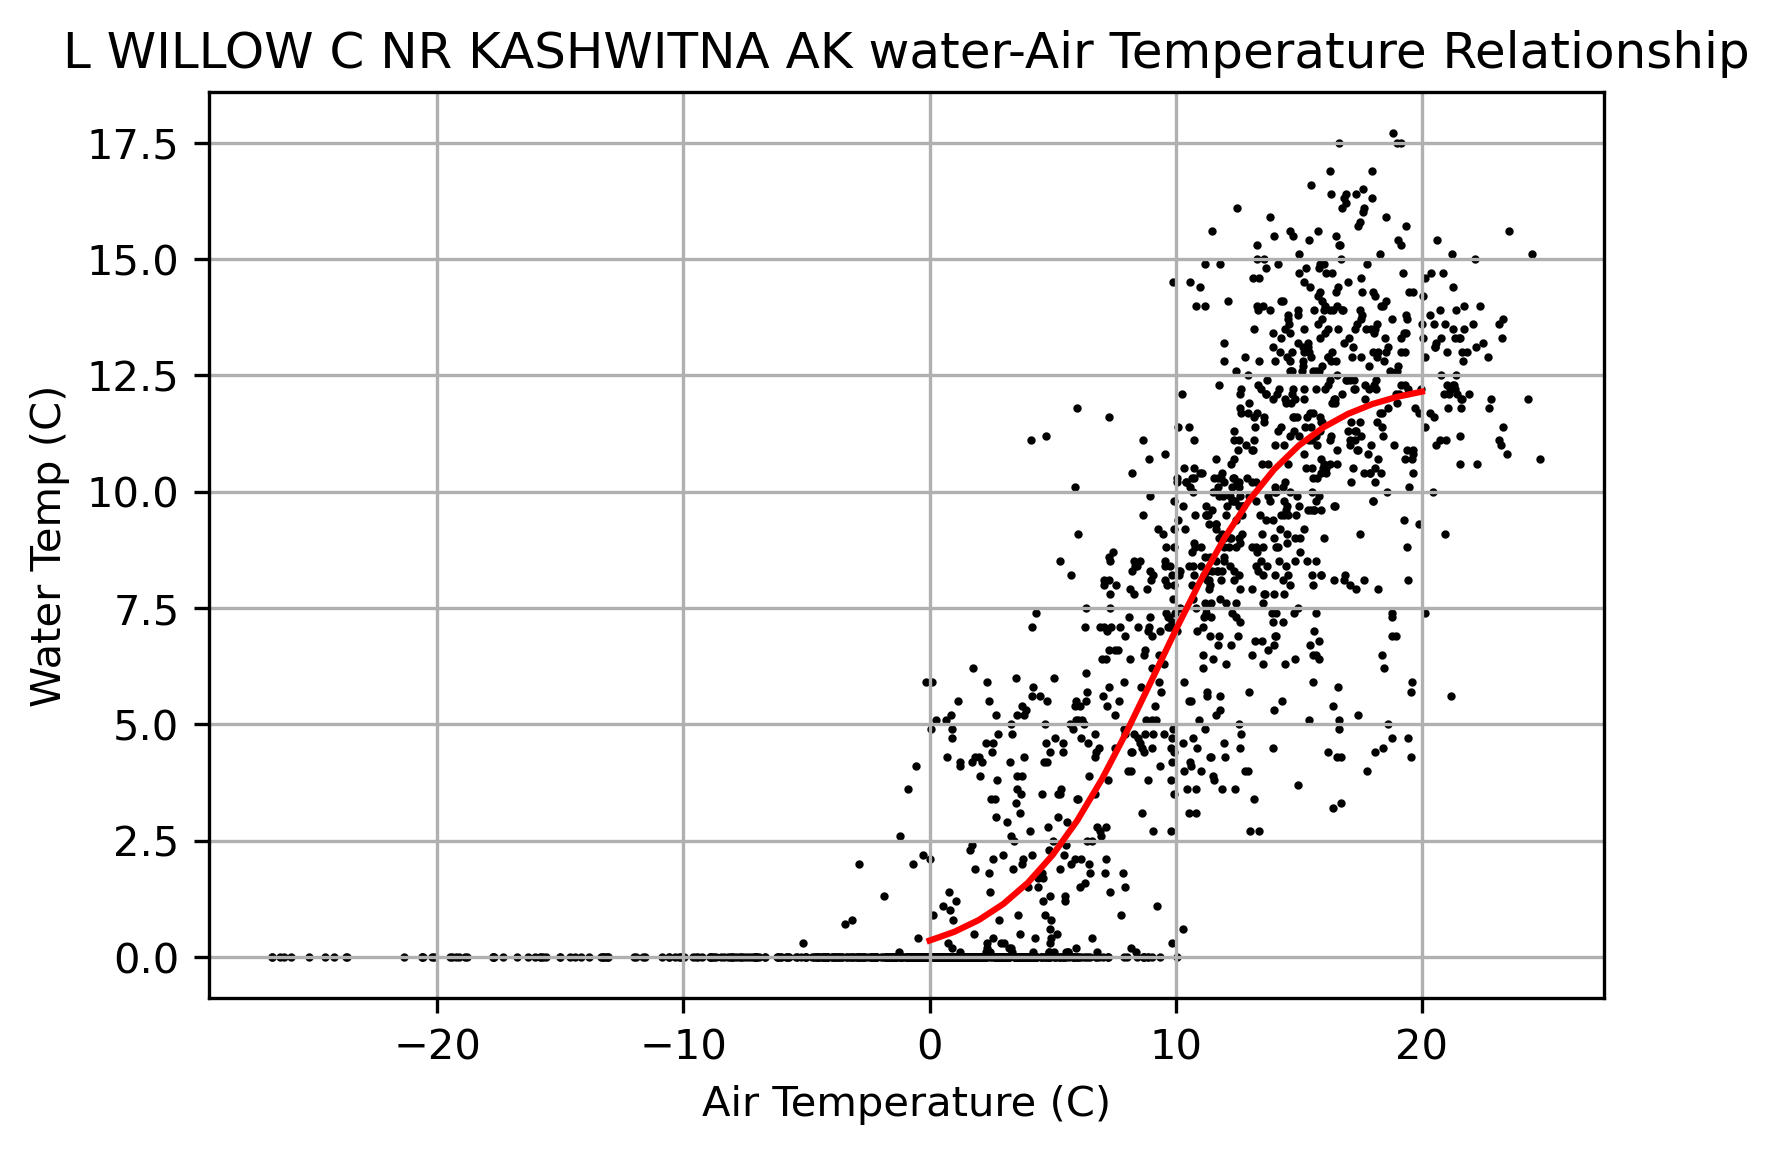

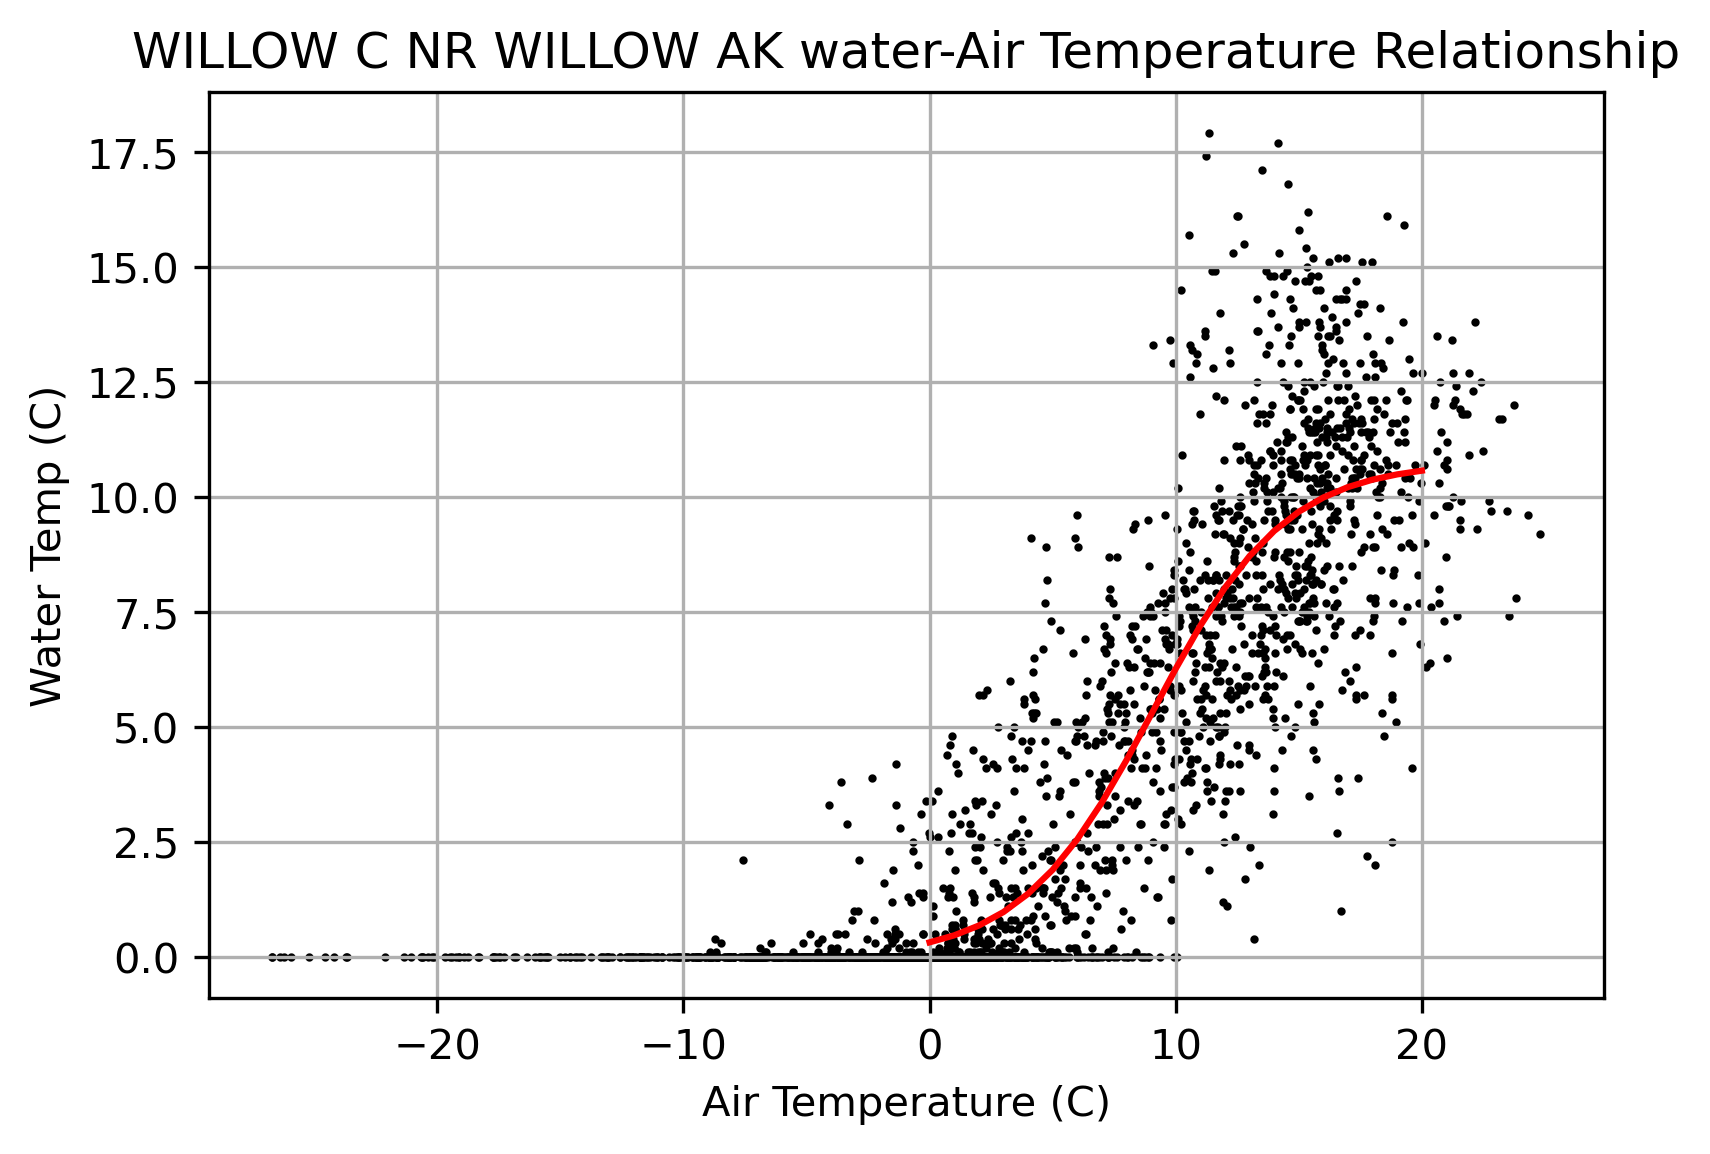

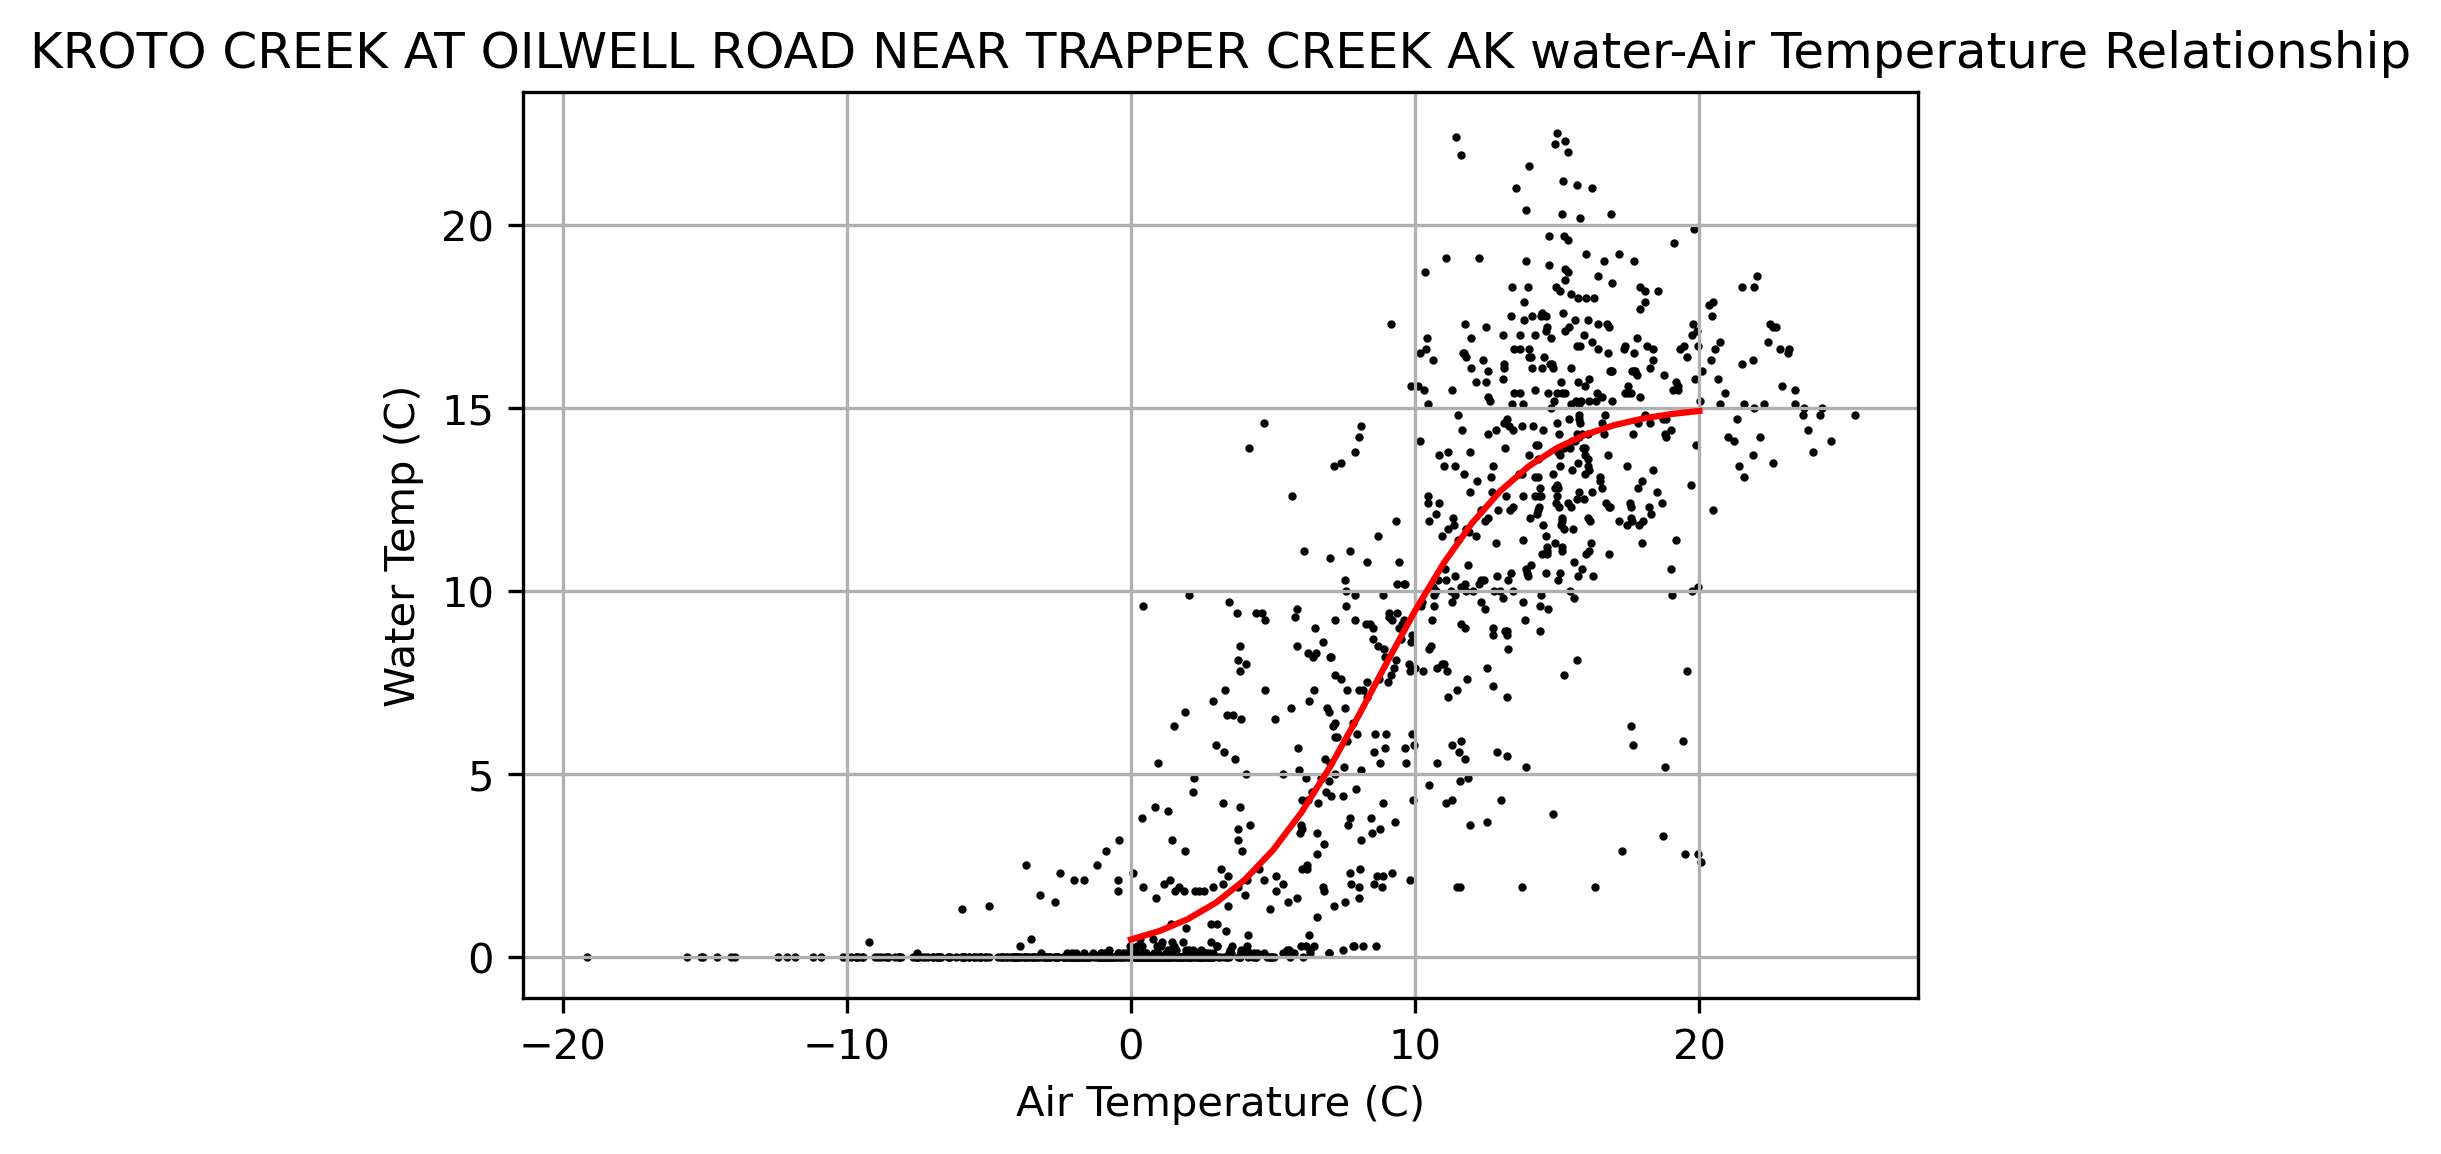

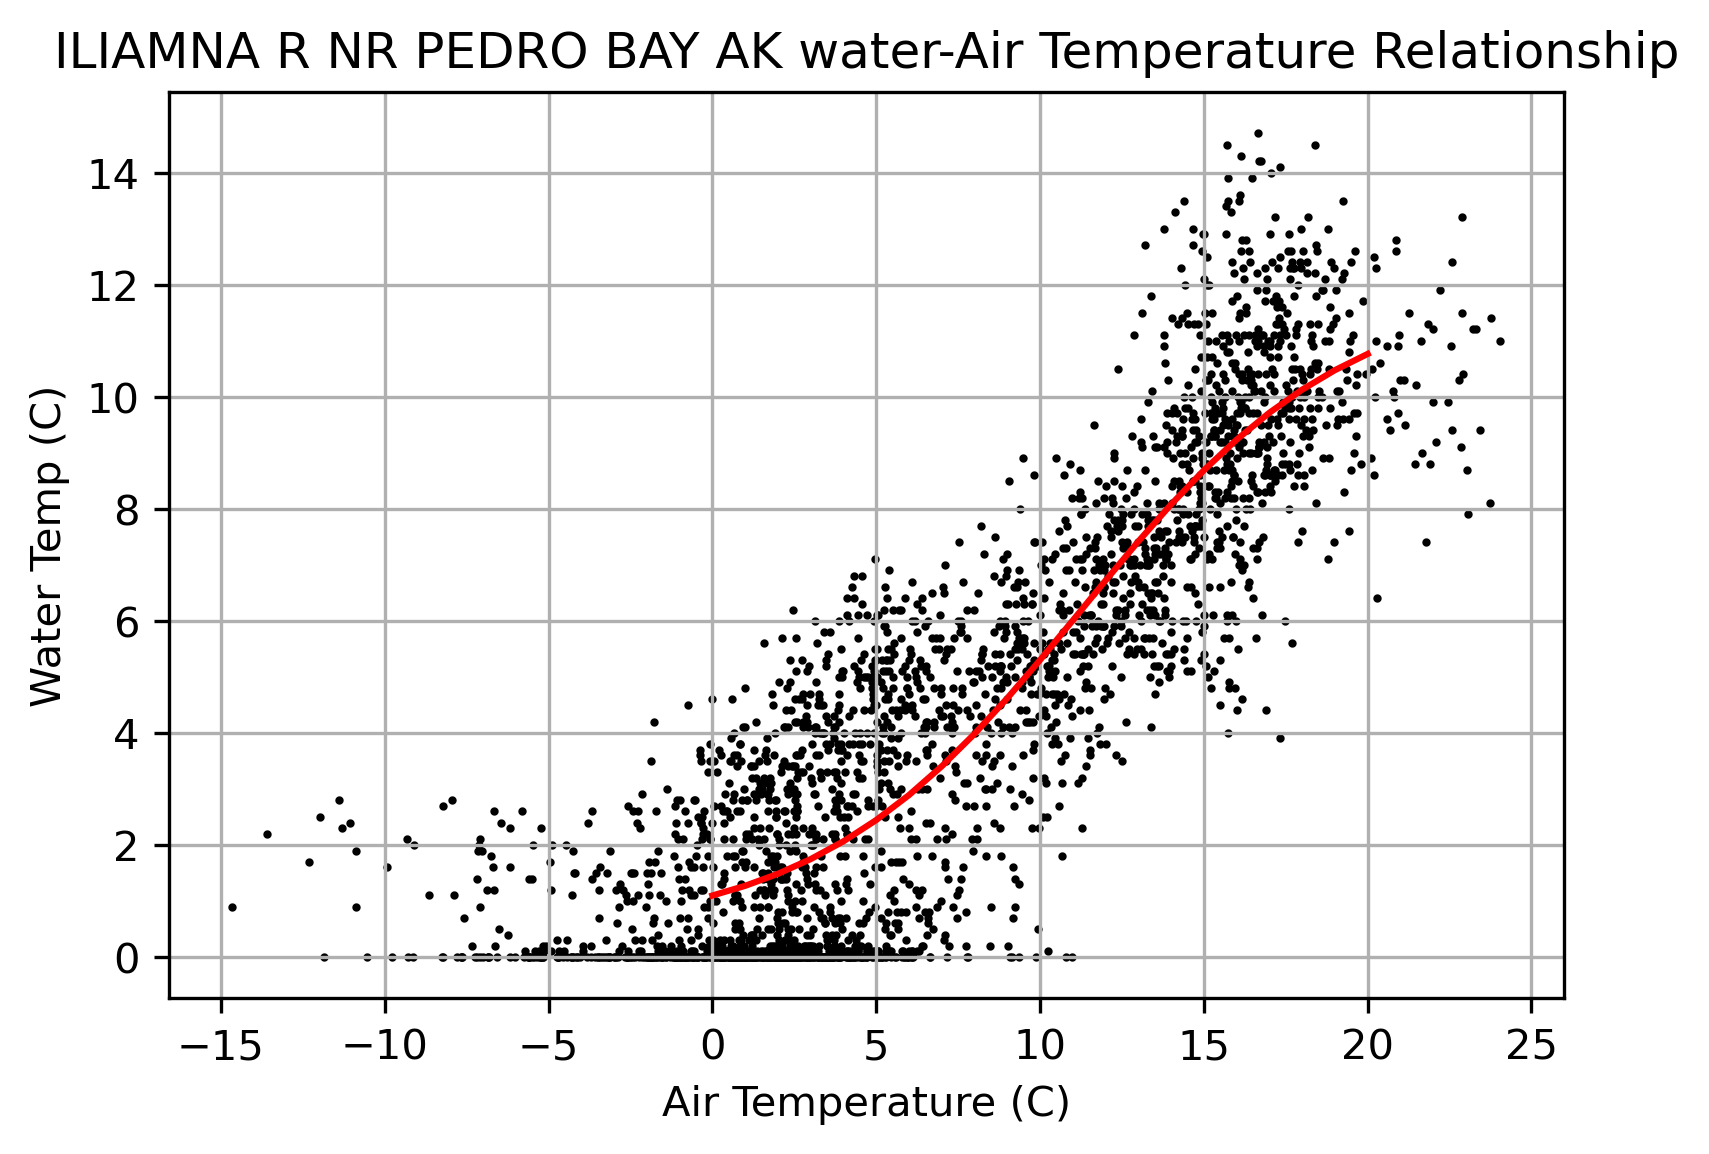

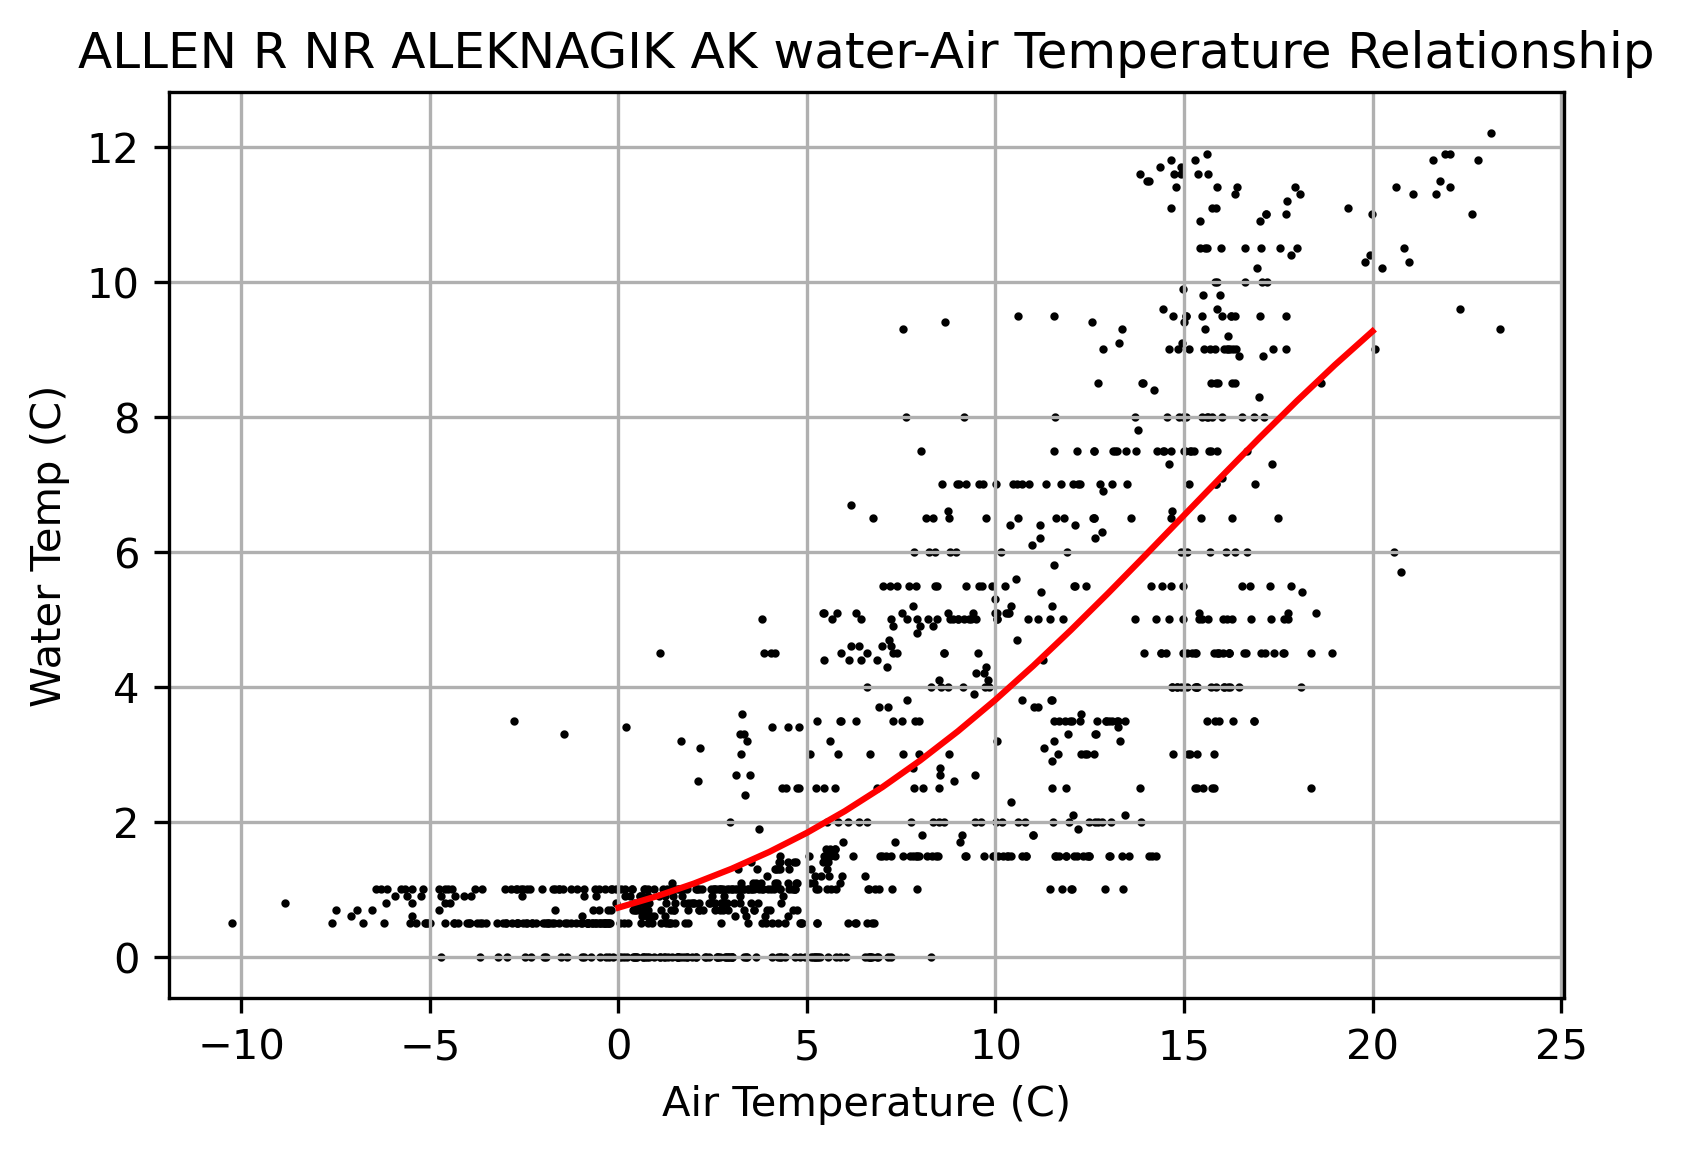

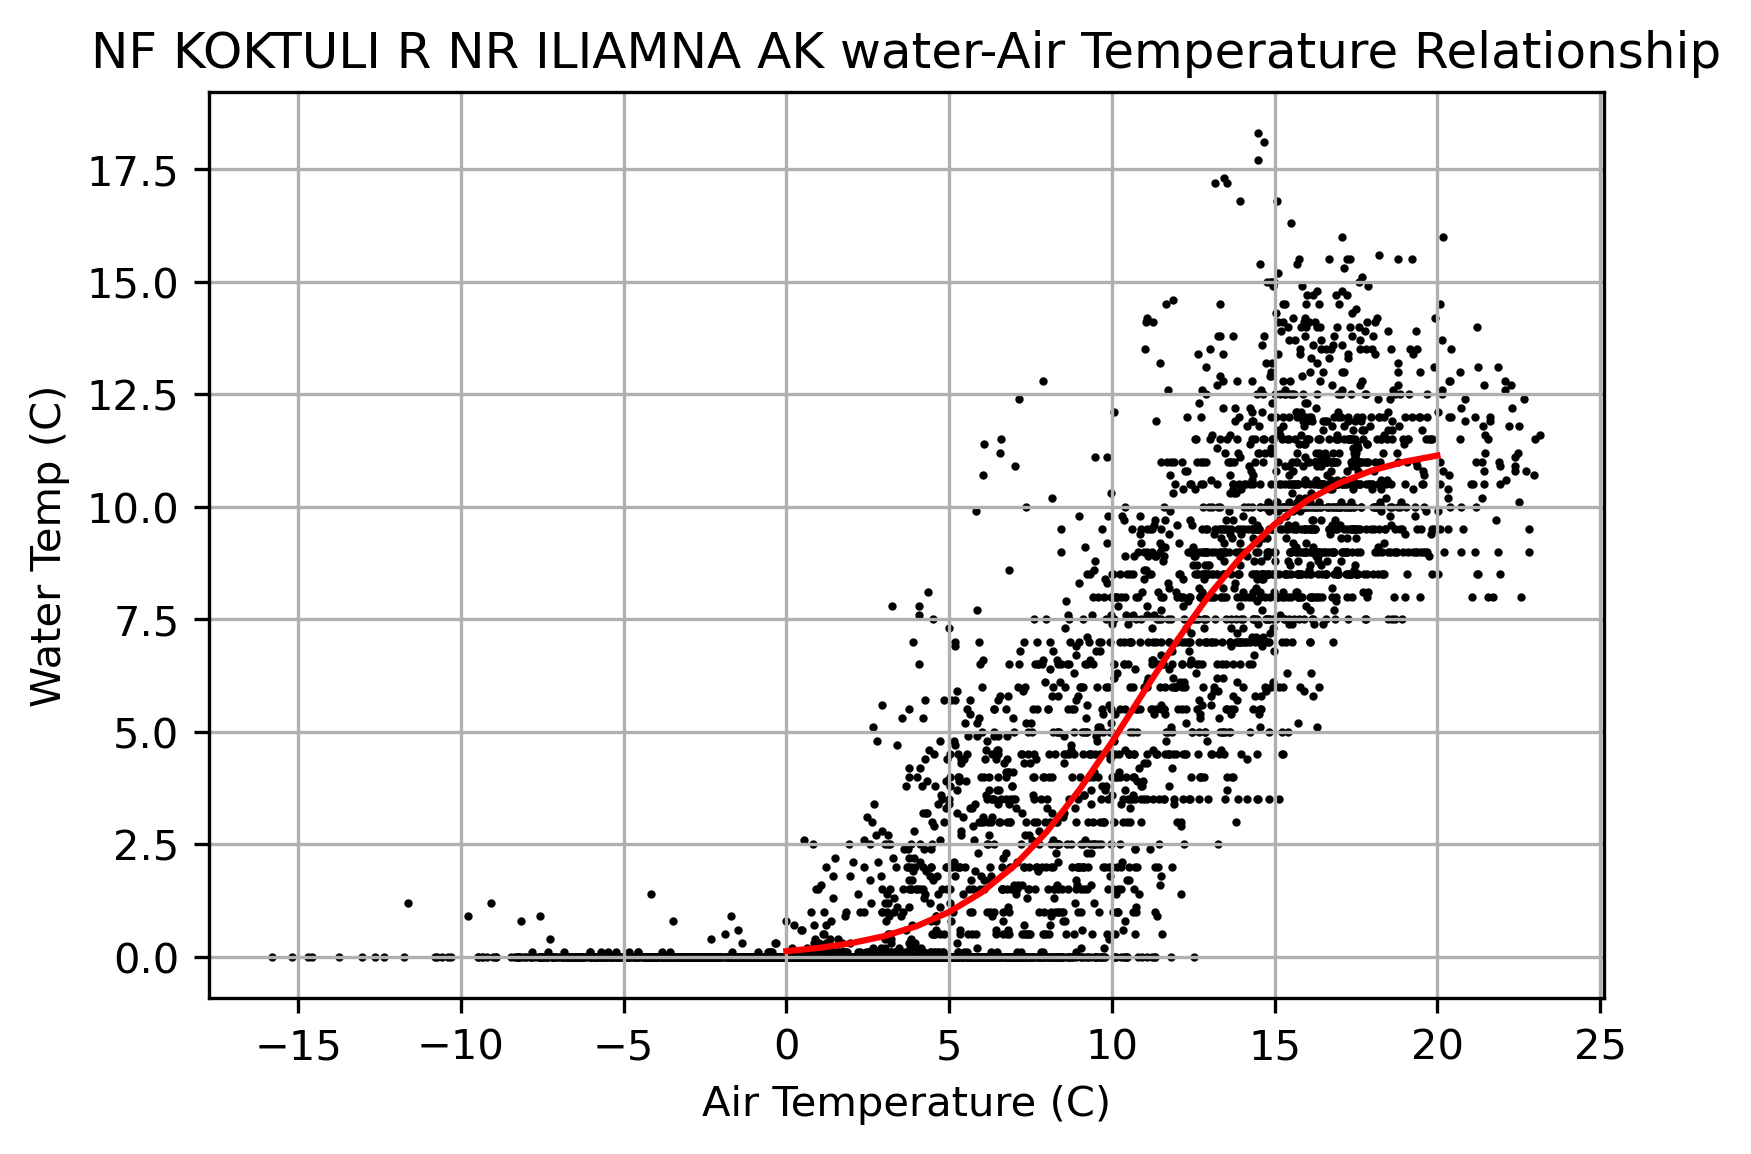

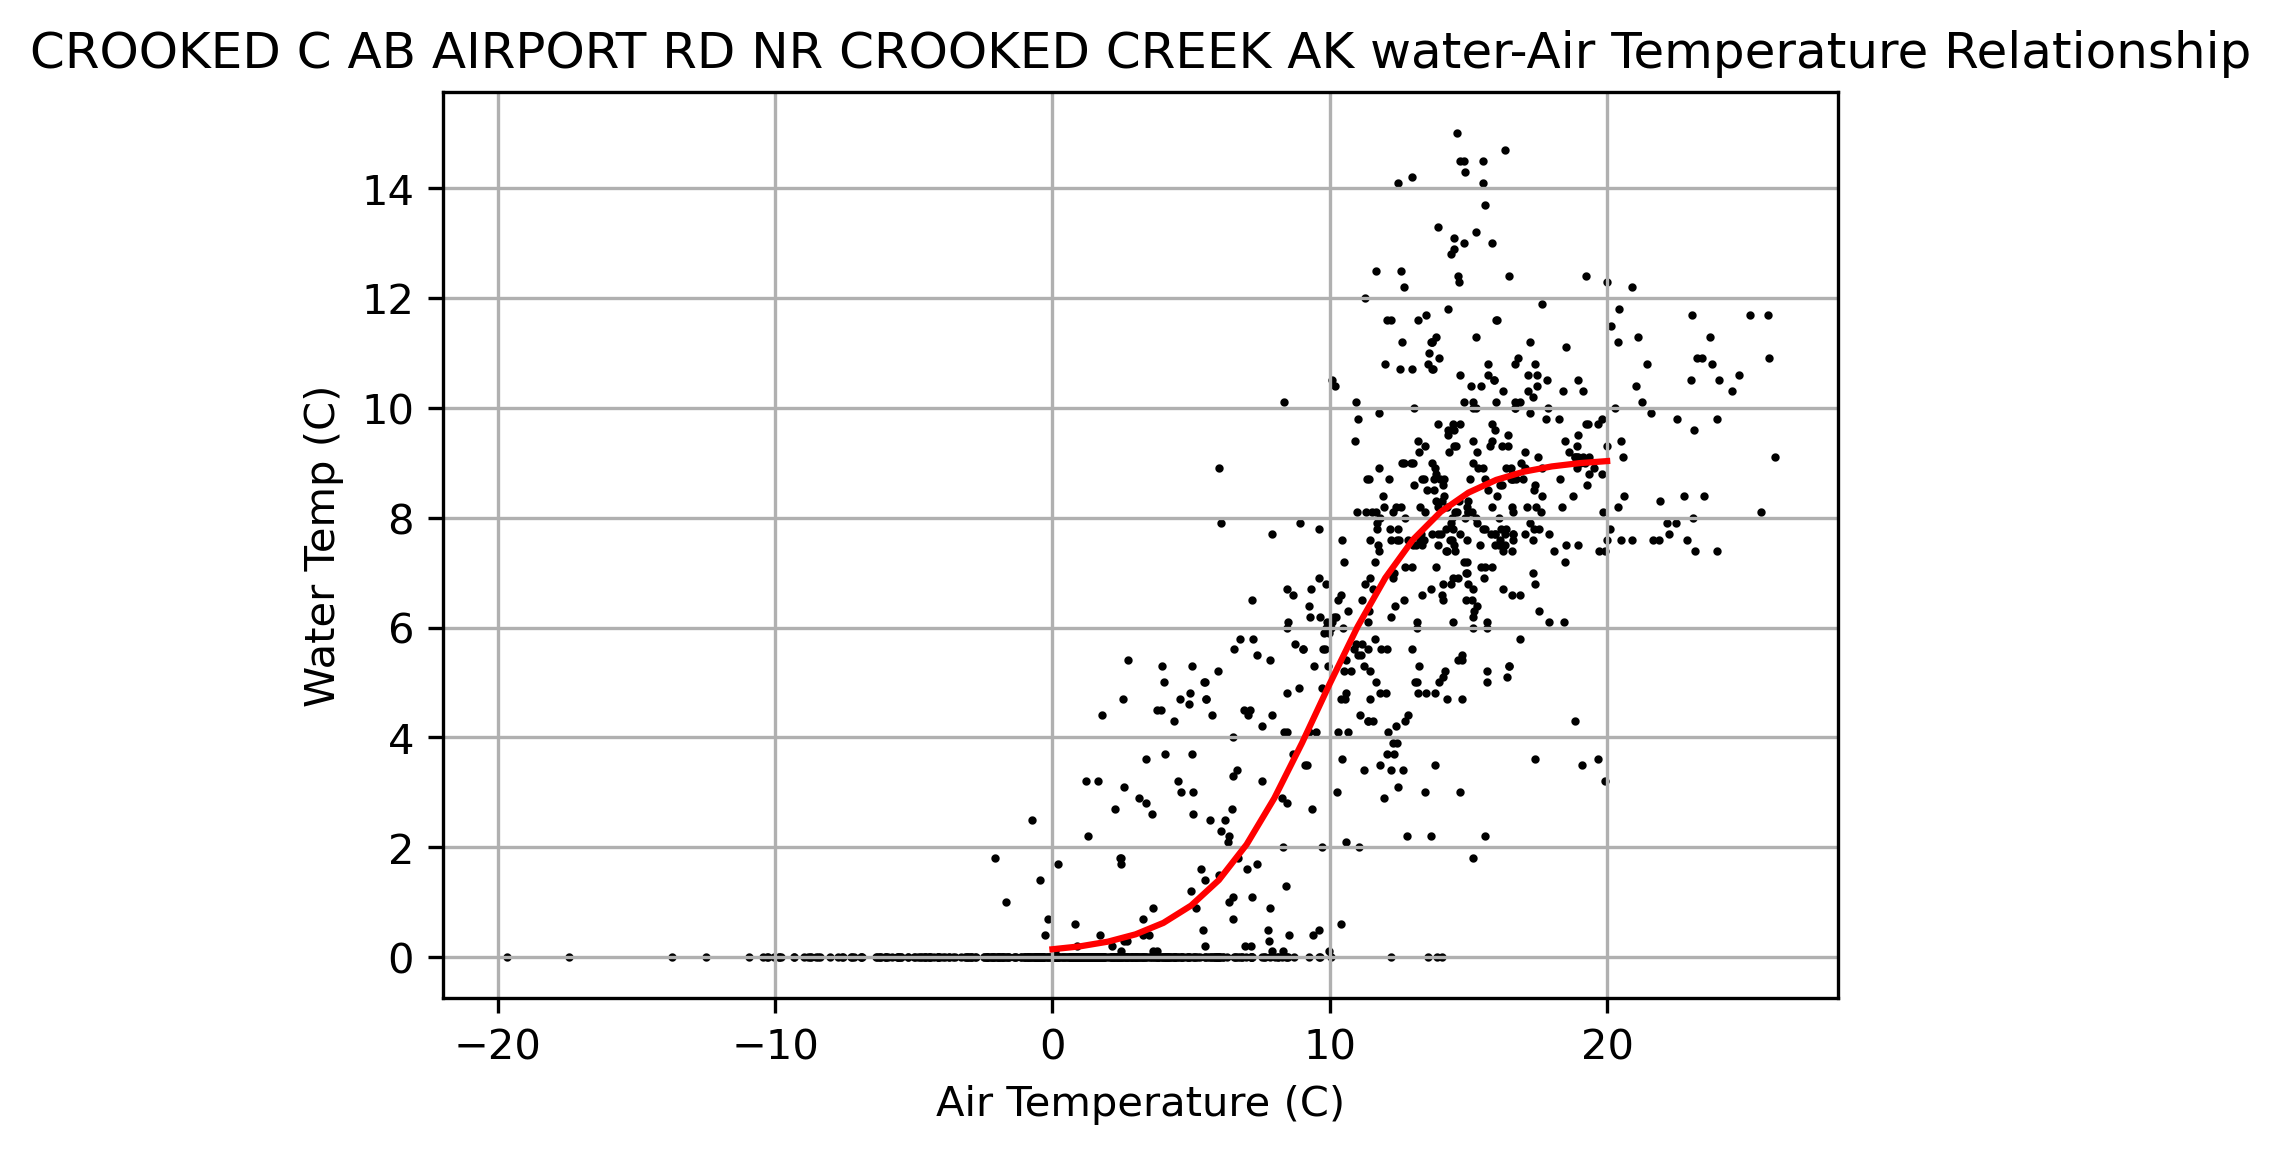

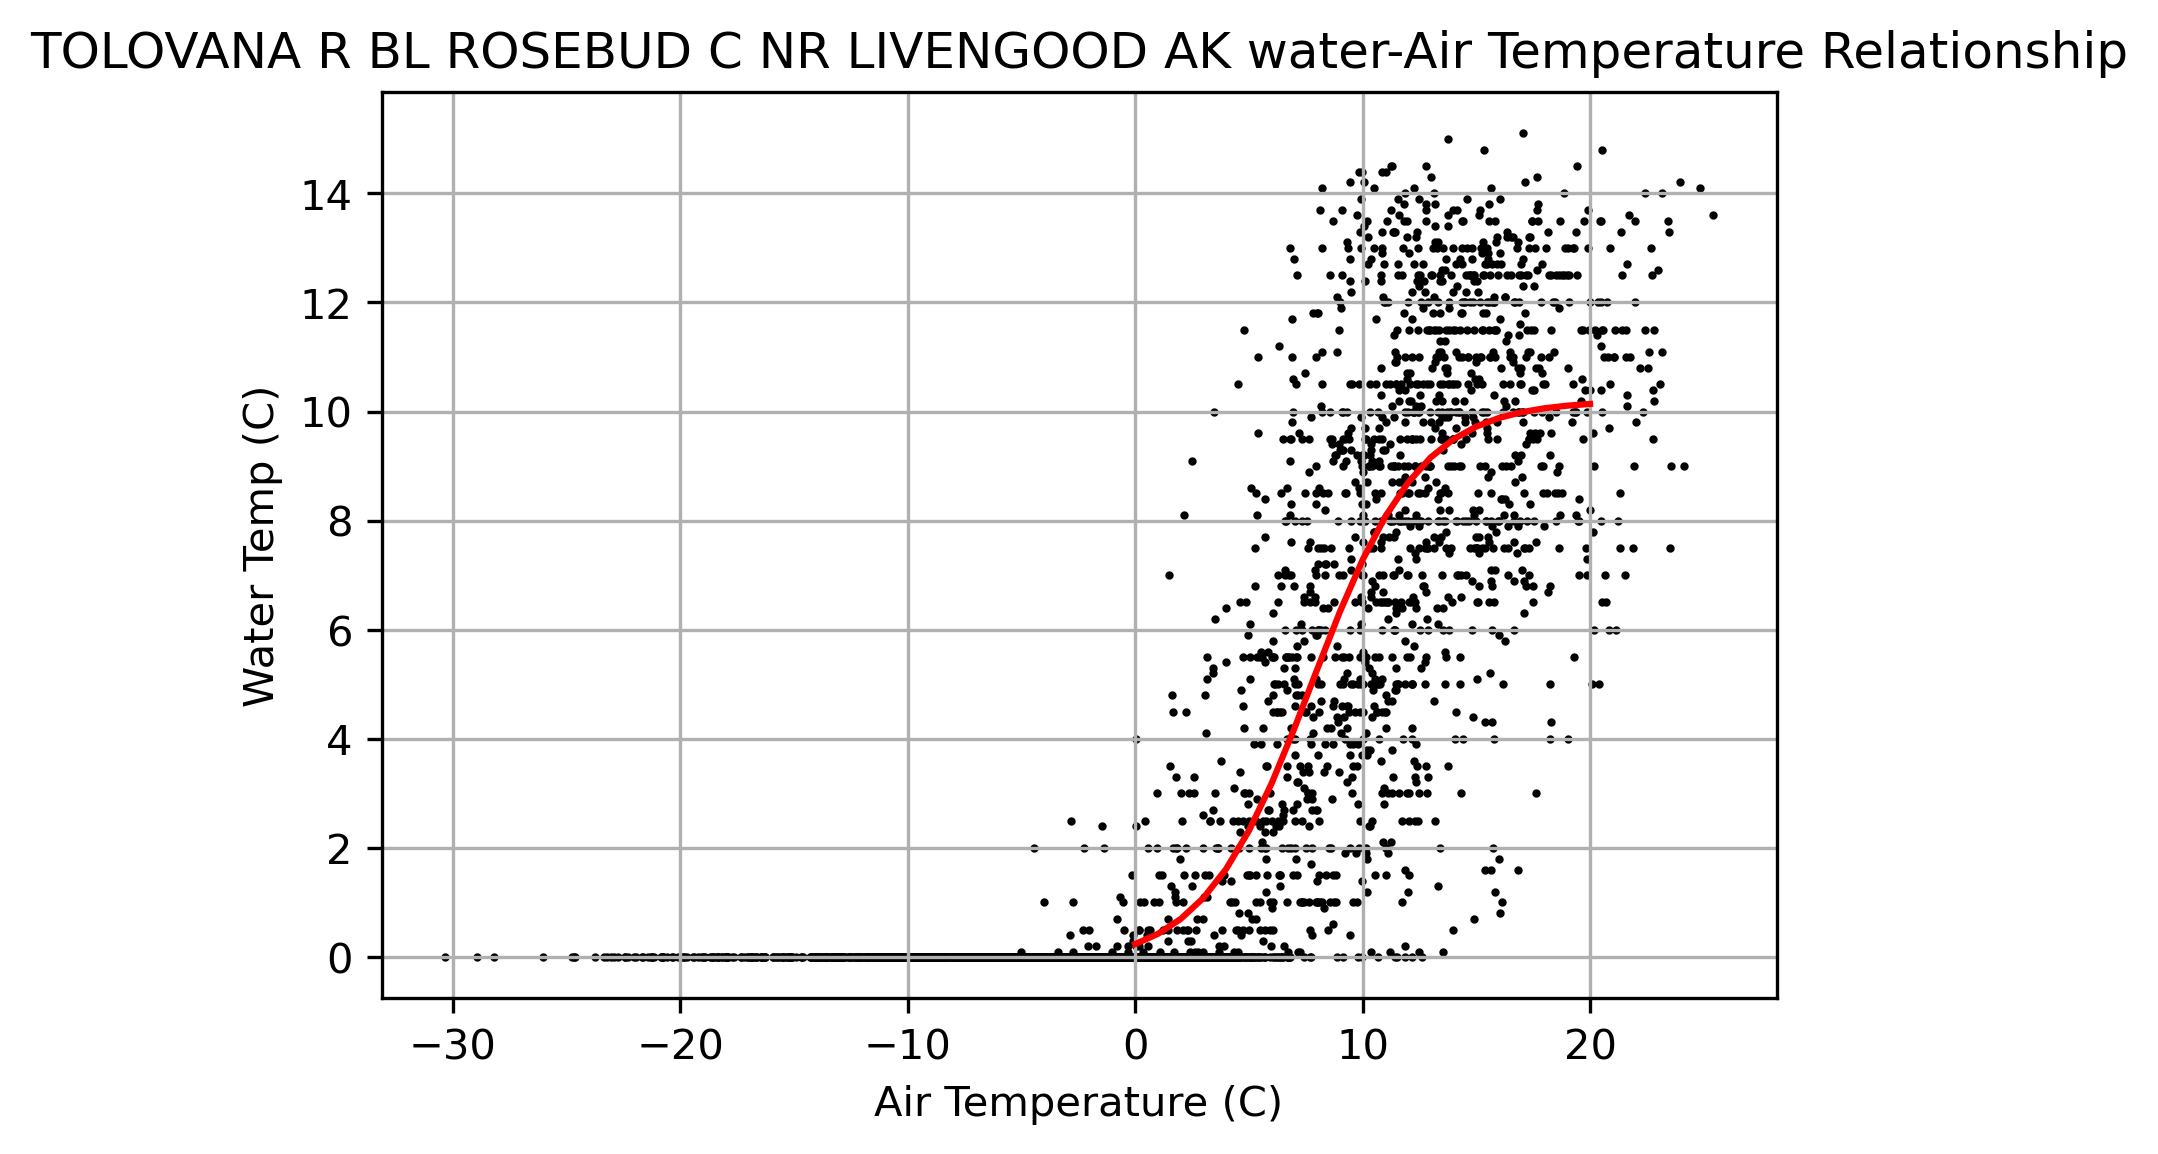

In [103]:
at = range(0, 21)

for site in parameters_loc.site_no.unique():

    test_df = merge_df[merge_df['site_no'] == site]
    
    alpha = parameters_loc[parameters_loc['site_no'] == site]['alpha'].values[0]
    beta = parameters_loc[parameters_loc['site_no'] == site]['beta'].values[0]
    gamma = parameters_loc[parameters_loc['site_no'] == site]['gamma'].values[0]
    mu = parameters_loc[parameters_loc['site_no'] == site]['mu'].values[0]
    
    site_name = parameters_loc[parameters_loc['site_no'] == site]['station_nm'].values[0]
    
    wt = []
    for temp in at:
        wt.append(mu + (alpha - mu)/(1+math.exp(gamma*(beta-temp))))
    
    fig, ax = plt.subplots()

    fig.set_dpi(300)

    ax.scatter(test_df['Air_Temp'].values, test_df['X_00010_00003'].values, c="black", s=1)

    ax.set(xlabel='Air Temperature (C)', ylabel='Water Temp (C)',
           title='%s water-Air Temperature Relationship'%(site_name))
    ax.plot(list(at), wt, c='red')
    ax.grid()

    fig.savefig("/glade/u/home/dblaskey/Figures/%s_Air_Water_Temp.png"%site)
    plt.show()

In [91]:
at = range(0, 21)
wt = []
for temp in at:
    wt.append(mu + (alpha - mu)/(1+math.exp(gamma*(beta-temp))))